# INN Hotels Project

By: Glen A Patterson

Date: 5/24/2023

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


### Data Dictionary

* **Booking_ID:** unique identifier of each booking
* **no_of_adults:** Number of adults
* **no_of_children:** Number of Children
* **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan:** Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time:** Number of days between the date of booking and the arrival date
* **arrival_year:** Year of arrival date
* **arrival_month:** Month of arrival date
* **arrival_date:** Date of the month
* **market_segment_type:** Market segment designation.
* **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status:** Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help read, save, and manipulate data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 50)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build the Logistic regression_model
from sklearn.linear_model import LogisticRegression
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# to check model performance
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# to build and visualize the Decision Tree_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Hyperparameter Tuning of the Decision Tree to build a better model
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# Load the csv file and call the dataframe "HotelsGroup"
HotelsGroup = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
# Make a copy of original dataframe "HotelsGroup" and call it "data".  We will be modifying this dataframe
data = HotelsGroup.copy()

<IPython.core.display.Javascript object>

In [4]:
# Observing the head of the first 10 rows of the dataset to make sure it loaded correctly and examine the data.
data.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   
6                  3       Meal Plan 1                           0   
7                  3       Meal Plan 1                           0   
8                  4       Meal Plan 1                           0   
9                  5       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   
5        Room_Type 1        346          2018              9            13   
6        Room_Type 1         34          2017             10            15   
7        Room_Type 4         83          2018             12            26   
8        Room_Type 1        121          2018              7             6   
9        Room_Type 4         44          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   
6                                     0              107.55   
7                                     0              105.61   
8                                     0               96.90   
9                                     0              133.44   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                 

<IPython.core.display.Javascript object>

In [5]:
# Get information about the number of rows and columns in the dataset (rows, columns)
data.shape

(36275, 19)

<IPython.core.display.Javascript object>

- We can see that there is 36,275 rows and 19 columns

In [6]:
# See if there is any duplicated rows
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There is no duplicated rows in dataset.

In [7]:
# Information on dataset (data types, format, missing data, ect.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

- There is no missing data in this dataset
- There is 5.3MB memory used
- There is one "float64", thirteen "int64" and five "object" data types

In [8]:
# Dropping Booking_ID from the dataset as it will not be needed for modeling
data = data.drop(columns="Booking_ID", axis=1)

<IPython.core.display.Javascript object>

In [9]:
# Converting object data types to category for the following columns
data["type_of_meal_plan"] = data["type_of_meal_plan"].astype("category")
data["room_type_reserved"] = data["room_type_reserved"].astype("category")
data["market_segment_type"] = data["market_segment_type"].astype("category")

<IPython.core.display.Javascript object>

In [10]:
# Check the different category values entered in dataset and there value counts
print(data.type_of_meal_plan.value_counts())
print(data.room_type_reserved.value_counts())
print(data.market_segment_type.value_counts())
print(data.booking_status.value_counts())

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


<IPython.core.display.Javascript object>

In [11]:
# New updated information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

<IPython.core.display.Javascript object>

- Memory used went down from 5.3MB to 4.3MB after changes to dataset

In [12]:
# Explore the Statistics in data and look for outliers in dataset
data.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

<IPython.core.display.Javascript object>

# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Univariate analysis:

In [13]:
# function to create labeled barplots
def labeled_barplot(data, feature, figuresize=3, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, figuresize * 6))
    else:
        plt.figure(figsize=(n + 2, figuresize * 6))

    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=25,
            xytext=(0, 10),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# This is a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observation on no_of_adults

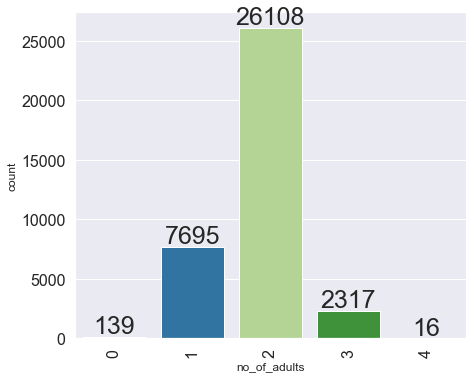

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(data, "no_of_adults", 1)

- There are 139 bookings with no adults
- There are 7,695 bookings with one adult
- There are 26,108 bookings with two adults
- There are 2,317 bookings with three adults
- There are 16 bookings with four adults

### Observation on no_of_children

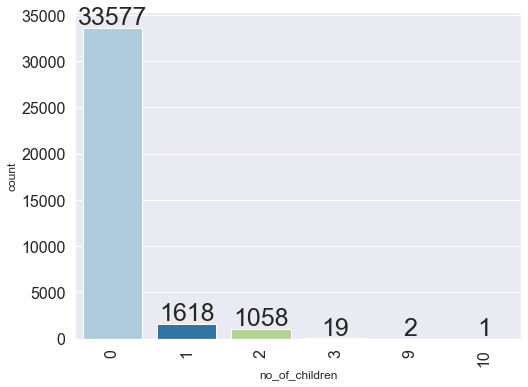

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(data, "no_of_children", 1)

- There are 33,577 bookings with no children
- There are 1,618 bookings with one child
- There are 1,058 bookings with two children
- There are 19 bookings with three children
- There are 2 bookings with nine children
- There are 1 booking with ten children

### Observation on no_of_weekend_nights

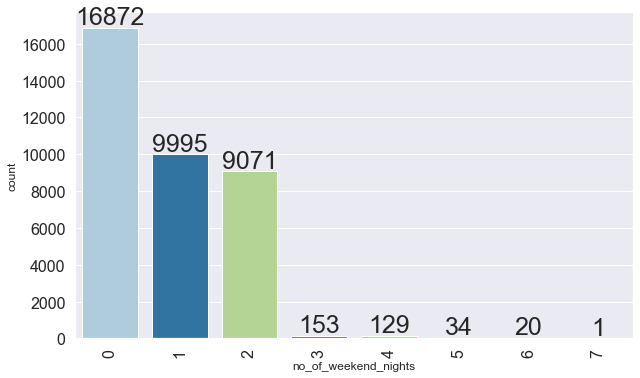

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(data, "no_of_weekend_nights", 1)

- There are 16,872 bookings with no weekend night stay at hotel
- There are 9,995 bookings with one weekend night stay at hotel
- There are 9,071 bookings with two weekend nights stay at hotel
- There are 153 bookings with three weekend nights stay at hotel
- There are 129 bookings with four weekend nights stay at hotel
- There are 34 bookings with five weekend nights stay at hotel
- There are 20 bookings with six weekend nights stay at hotel
- There are 1 booking with seven weekend nights stay at hotel

### Observation on no_of_week_nights

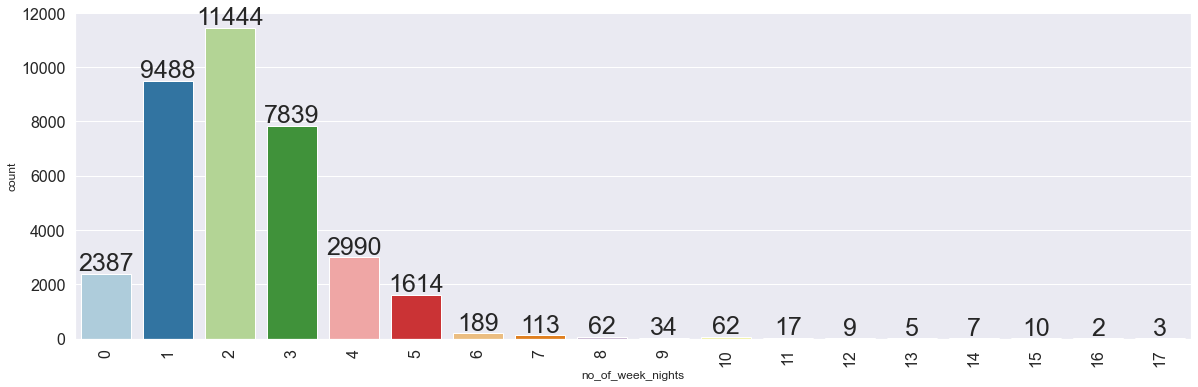

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(data, "no_of_week_nights", 1)

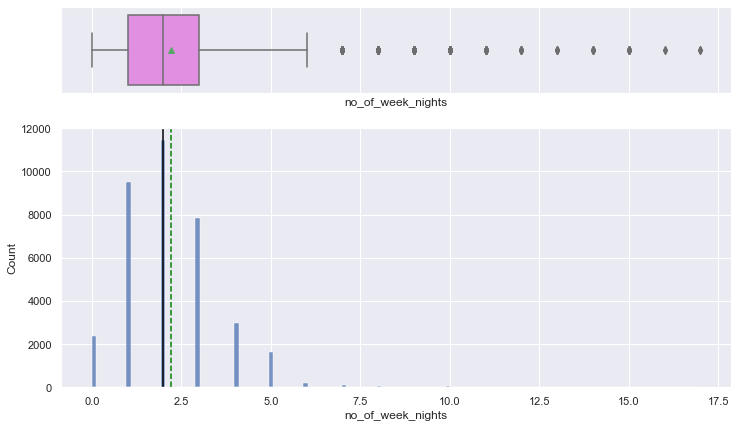

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "no_of_week_nights")

- There are 2,387 bookings with no week night stay at hotel
- There are 9,488 bookings with one week night stay at hotel
- There are 11,444 bookings with two week nights stay at hotel
- There are 7,839 bookings with three week nights stay at hotel
- There are 2,990 bookings with four week nights stay at hotel
- There are 1,614 bookings with five week nights stay at hotel
- There are 513 bookings with more than six week nights stay at hotel
- Max week nights stay at hotel is seventeen

### Observation on type_of_meal_plan

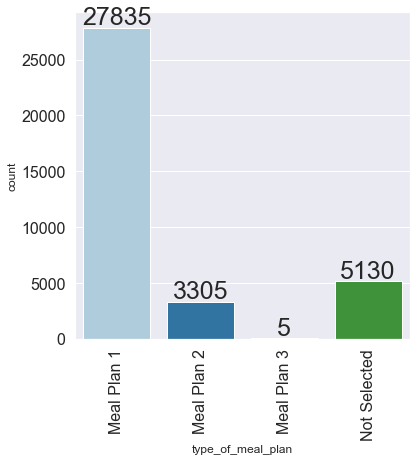

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(data, "type_of_meal_plan", 1)

- There are 5,130 bookings that have not selected a meal plan
- There are 27,835 bookings with meal plan 1
- There are 3,305 bookings with meal plan 2
- There are 5 bookings with meal plan 3

### Observation on required_car_parking_space

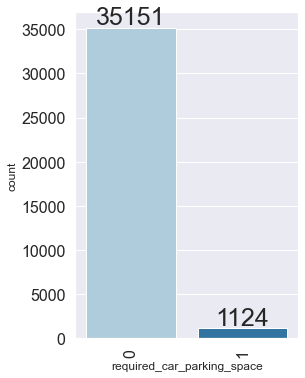

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(data, "required_car_parking_space", 1)

- 35,151 bookings do not require a parking space
- 1,124 bookings do require a parking space

### Observation on room_type_reserved

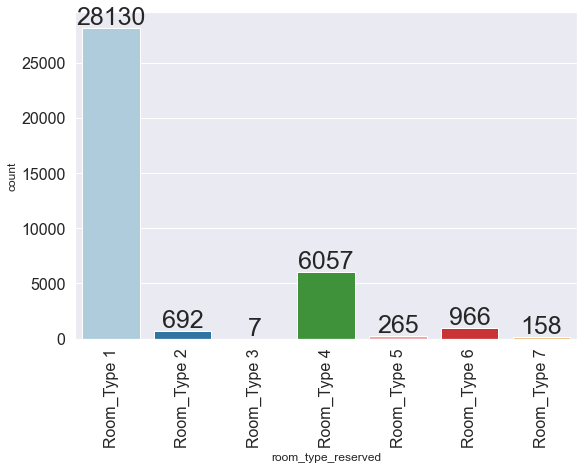

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "room_type_reserved", 1)

- 28,130 bookings with Room_Type 1 reserved
- 692 bookings with Room_Type 2 reserved
- 7 bookings with Room_Type 3 reserved
- 6,057 bookings with Room_Type 4 reserved
- 265 bookings with Room_Type 5 reserved
- 966 bookings with Room_Type 6 reserved
- 158 bookings with Room_Type 7 reserved

### Observation on lead_time

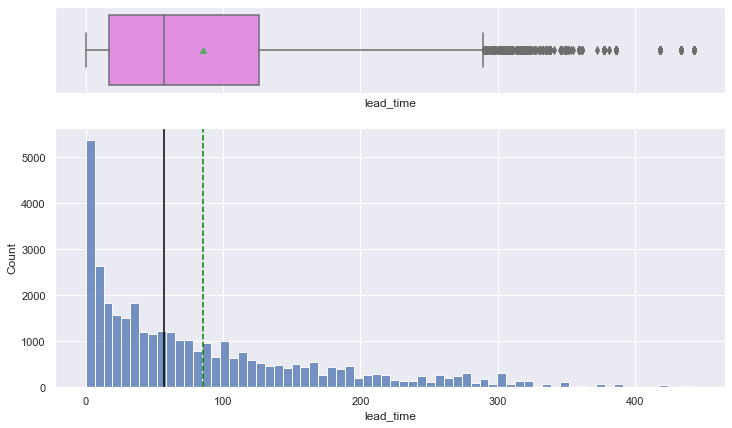

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "lead_time")

- The Median lead time is 57 days, lowest lead time is 0 days and longest lead time is 443 days
- The IQR is between lead time 17 and 126 days with a mean of 85
- There are outliers in lead time past 290 days

### Observation on arrival_year

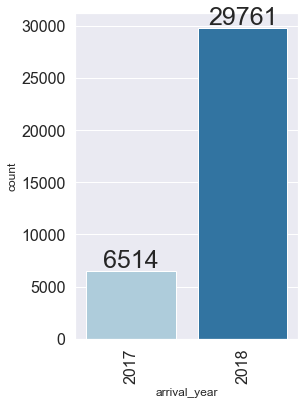

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "arrival_year", 1)

- 6,514 bookings was for arrival year 2017
- 29,761 bookings was for arrival year 2018

### Observation on arrival_month

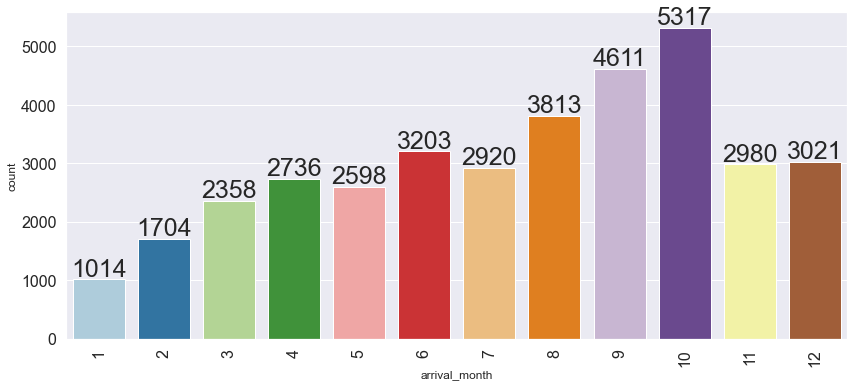

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "arrival_month", 1)

- January is the lowest booking month with 1,014 bookings
- Febuary is the second lowest booking month with 1,704 bookings
- **What are the busiest months in the hotel?**
- August, September, and October are the the busiest months with 3,813, 4,611 and 5,317 bookings respectively
- All other months are steady between 2,300 and 3,000 bookings

### Observation on arrival_date

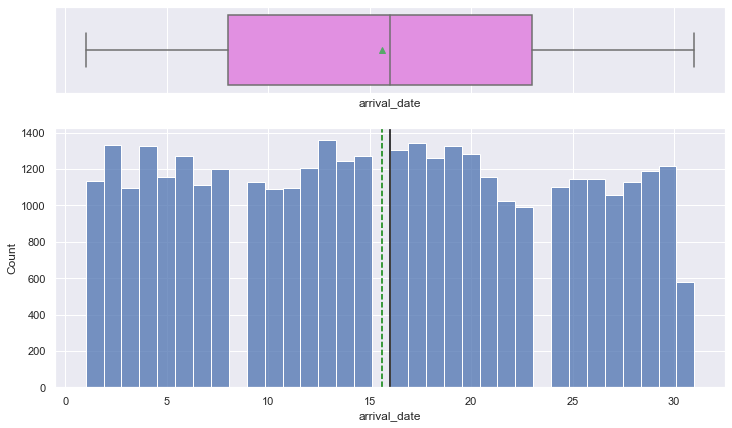

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data, "arrival_date")

- The arrival date are evenly distributed
- The IQR is between arrival date 8 and 23 with a mean of 16
- There is no outliers in arrival date

### Observation on market_segment_type

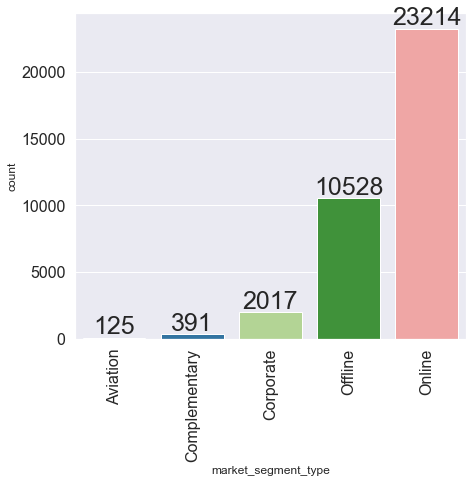

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "market_segment_type", 1)

- Market segment type Aviation has 125 bookings
- Market segment type Complementary has 391 bookings
- Market segment type Corporate has 2,017 bookings
- Market segment type Offline has 10,528 bookings
- Market segment type Online has 23,214 bookings

**Which market segment do most of the guests come from?**

- Most of the market segment comes from Online

### Observation on repeated_guest

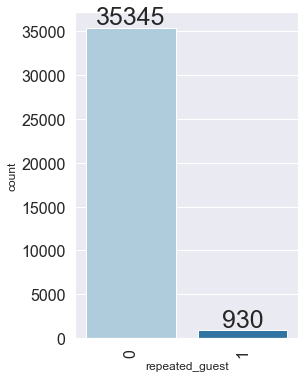

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "repeated_guest", 1)

- 35,345 bookings are non-repeat guests
- 930 bookings are repeat guests

### Observation on no_of_previous_cancellations

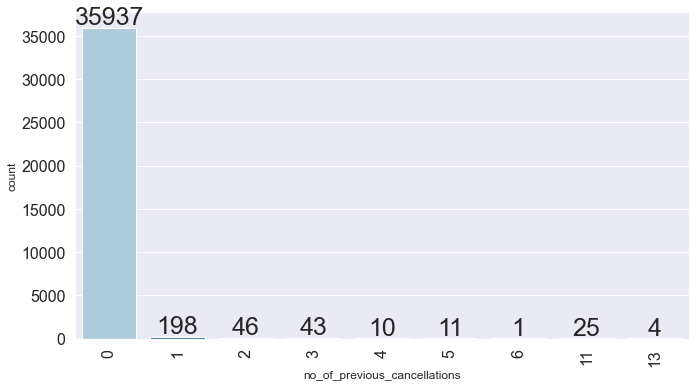

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "no_of_previous_cancellations", 1)

- 35,937 bookings have no previous cancellations
- 198 bookings have one previous cancellations
- 140 bookings have more than one previous cancellations
- There are 29 customers with eleven or more previous cancellations

### Observation on no_of_previous_bookings_not_canceled

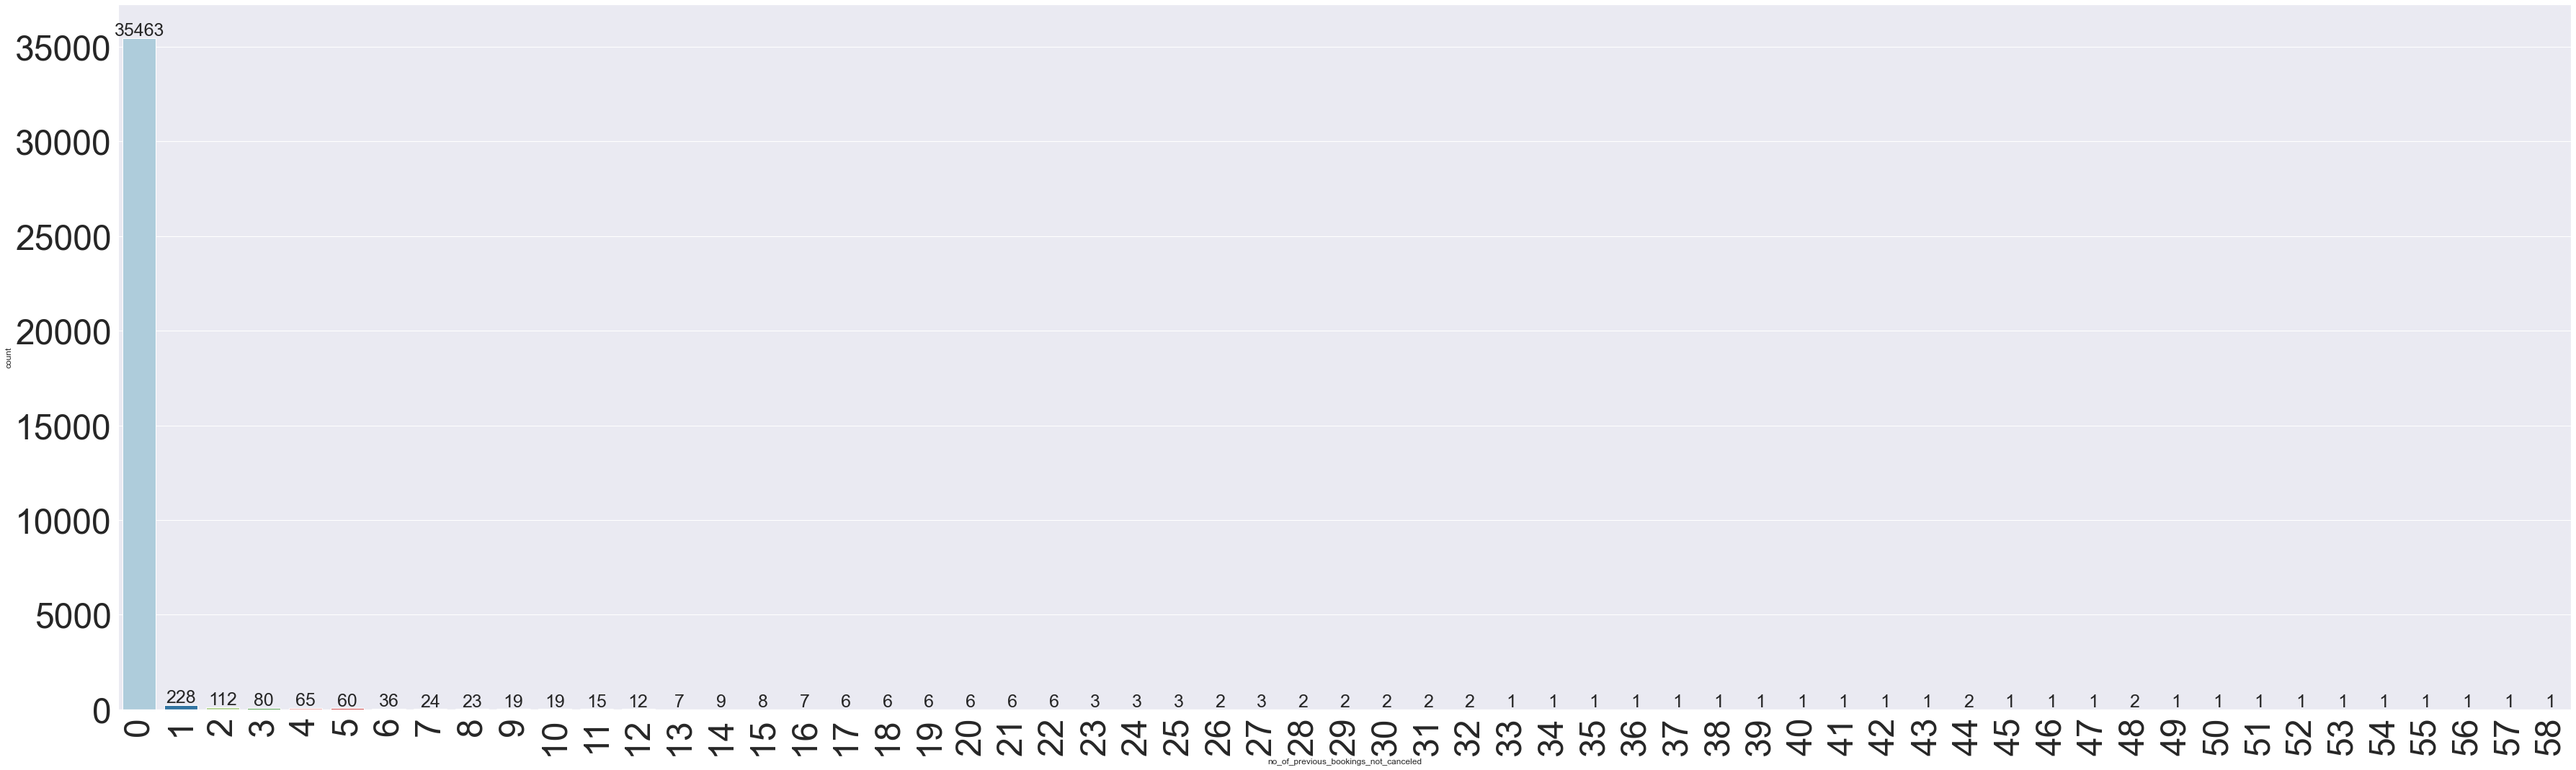

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "no_of_previous_bookings_not_canceled")

- Most bookings have no previous bookings not canceled by the customer prior to the current booking

### Observation on avg_price_per_room

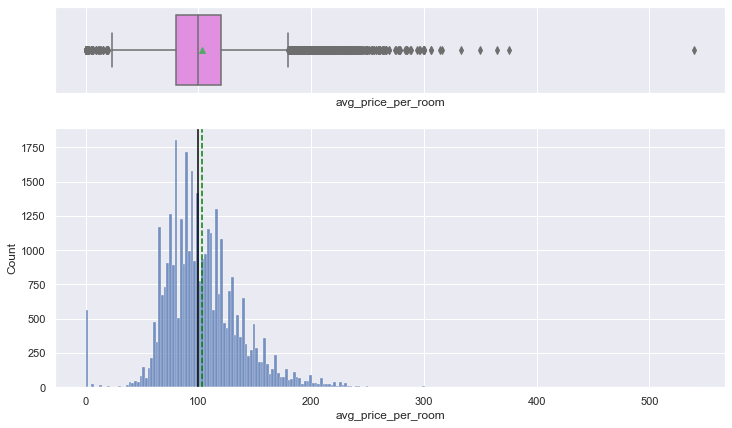

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data, "avg_price_per_room")

Average price per day of the reservation; prices of the rooms are dynamic. (in euros

- The Median avg price per room is 99 euros, lowest avg price per room is 0 euros and largest avg price per room is 540 euros
- The IQR is between avg price per room 80 and 120 euros with a mean of 103 euros
- There are outliers in avg price per room past 185 euros
- One outlier is much greater than the rest and might need to be removed

### Observation on no_of_special_requests

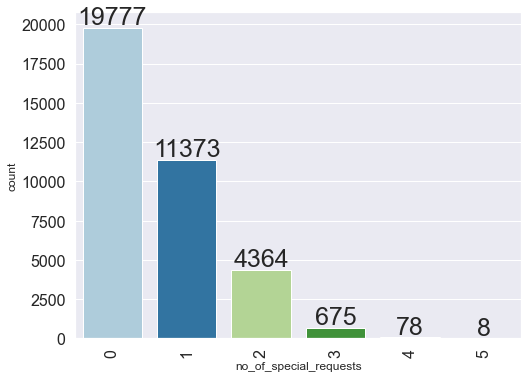

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(data, "no_of_special_requests", 1)

- 19,777 bookings have no special request
- 11,373 bookings have one special request
- 4,364 bookings have two special requests
- 675 bookings have three special requests
- 78 bookings have four special requests
- 8 bookings have five special requests

### Observation on booking_status

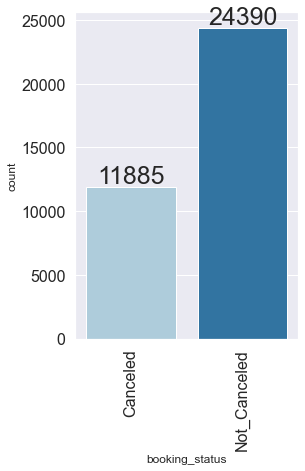

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(data, "booking_status", 1)

- 11,885 bookings have been Canceled
- 24,390 bookings have not been Canceled
- Target variable has an imbalance between Canceled and not Canceled

**What percentage of bookings are canceled?**

In [33]:
data["booking_status"].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

- 32.8% of the bookings are canceled

## Bivariate Analysis

In [34]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target, figuresize=3):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, figuresize * 5))
    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", prop={"size": 30}, bbox_to_anchor=(1, 1))
    plt.show()


# function to plot boxplot chart
def boxplot_chart(data_chart, x_axis, y_axis, x_rotation=0, figuresize=12):
    plt.figure(figsize=(15, 7))
    sns.boxplot(data=data_chart, x=x_axis, y=y_axis, palette="PuBu")
    plt.xticks(rotation=x_rotation, fontsize=figuresize)
    plt.show()


# function to plot lineplot chart
def lineplot_chart(data_chart, x_axis, y_axis):
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=data_chart, x=x_axis, y=y_axis)
    plt.show()

<IPython.core.display.Javascript object>

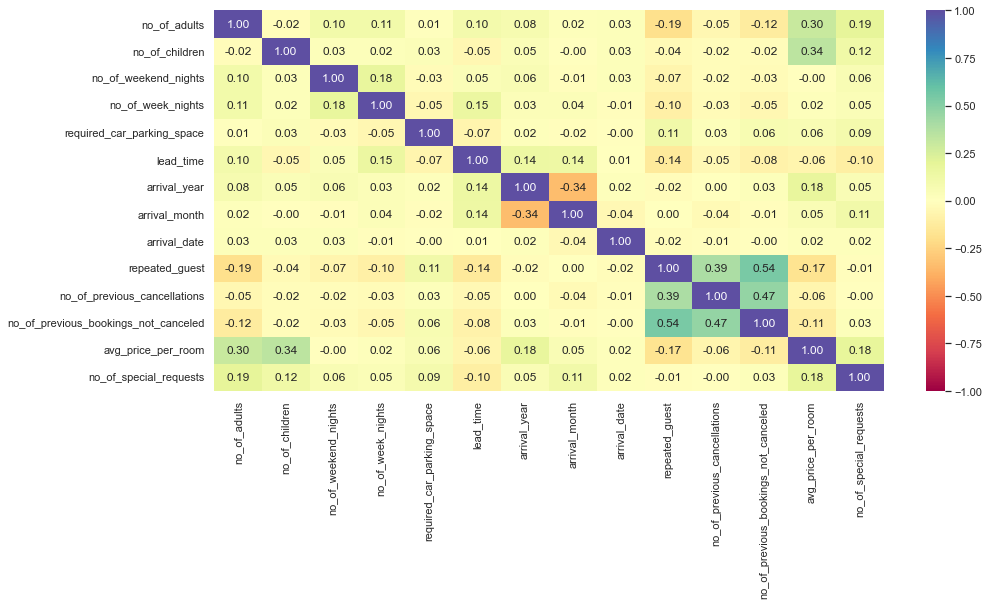

<IPython.core.display.Javascript object>

In [35]:
# Heatmap and correlation between the variables
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There is a positive correlation between repeated_guest and no_of_previous_bookings_not_canceled
- There is a positive correlation between repeated_guest and no_of_previous_cancellations
- There is a positive correlation between no_of_previous_cancellations and no_of_previous_bookings_not_canceled
- There is a small positive correlation between no_of_adults and avg_price_per_room
- There is a small positive correlation between no_of_children and avg_price_per_room

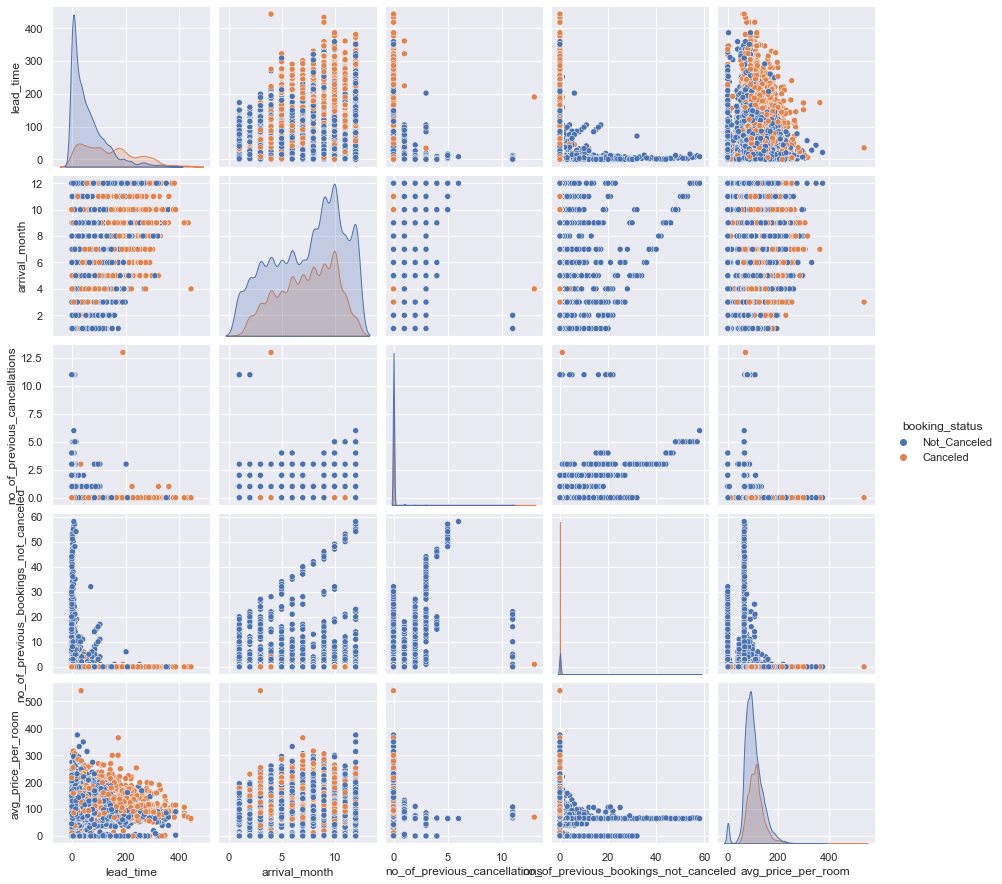

<IPython.core.display.Javascript object>

In [36]:
# Pairplot of dataset with hue of "booking_status"
sns.pairplot(
    data=data.drop(
        [
            "no_of_adults",
            "no_of_children",
            "no_of_weekend_nights",
            "no_of_week_nights",
            "required_car_parking_space",
            "no_of_special_requests",
            "arrival_date",
            "arrival_year",
            "repeated_guest",
        ],
        axis=1,
    ),
    hue="booking_status",
    diag_kind="kde",
)
plt.show()

- Most of the booking cancellation comes from bookings with long lead_time before arrival
- January and Febuary months don't have as many cancellations
- A lot of  the cancellations have no previous cancellations

**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

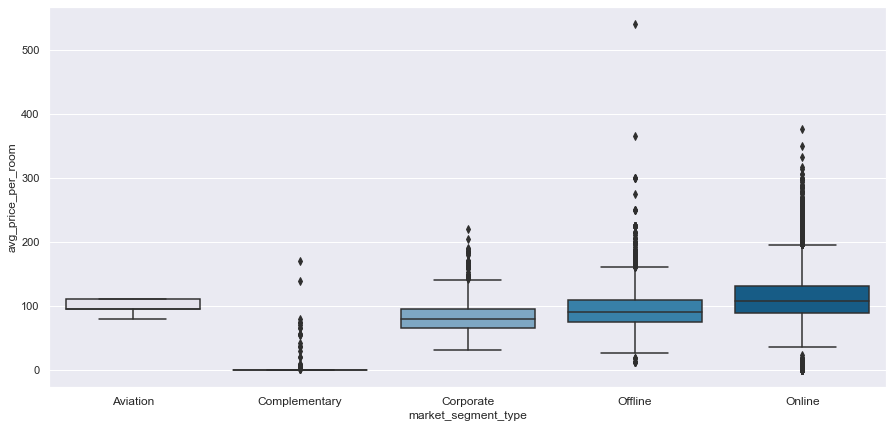

<IPython.core.display.Javascript object>

In [37]:
boxplot_chart(data, "market_segment_type", "avg_price_per_room")

- Online and Aviation have higher average prices per room
- Complementary market segment has the lowest average prices per room.  Most are free
- Corporate market segment has lower average prices per room compared to Offline market segment

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


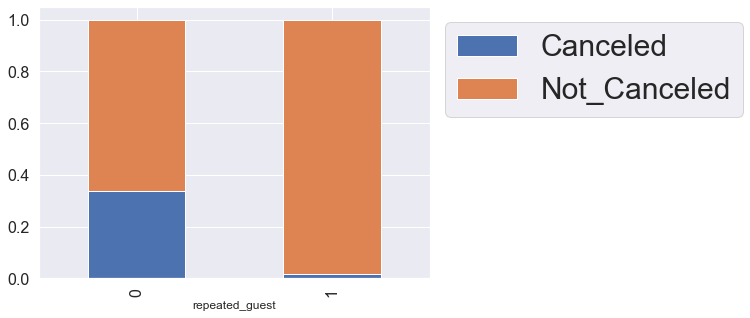

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(data, "repeated_guest", "booking_status", 1)

- Only 1.7% of repeating guests cancel

**Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


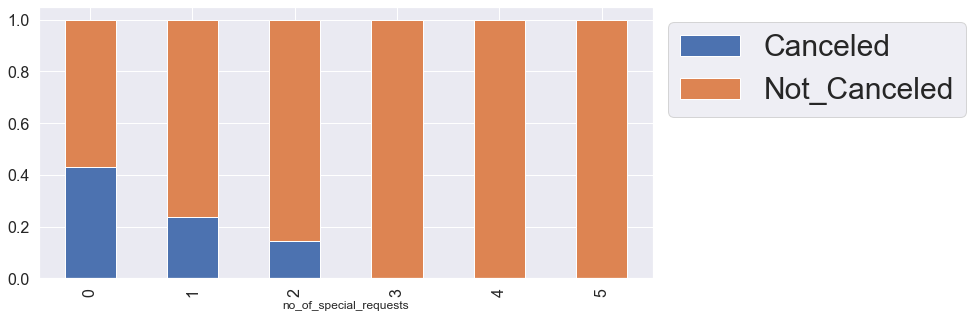

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(data, "no_of_special_requests", "booking_status", 1)

- Guests with more special requirements have a less chance of a booking cancellation

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


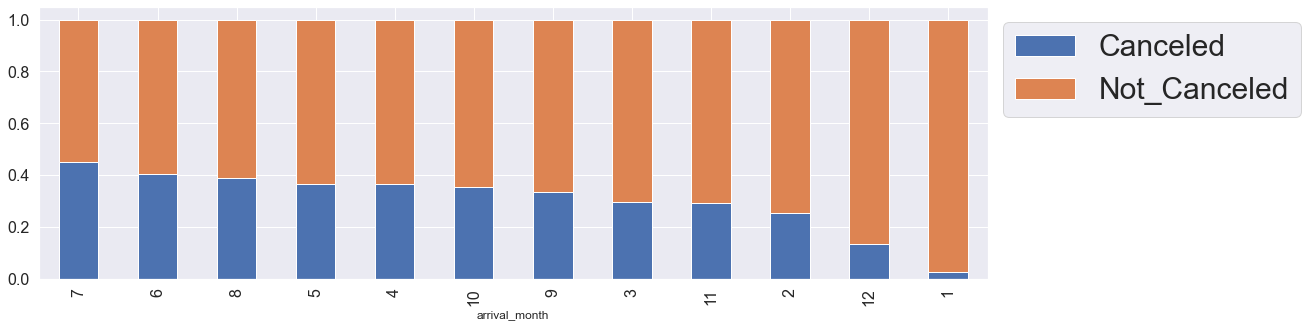

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(data, "arrival_month", "booking_status", 1)

- Summer months have more cancellations than winter months

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


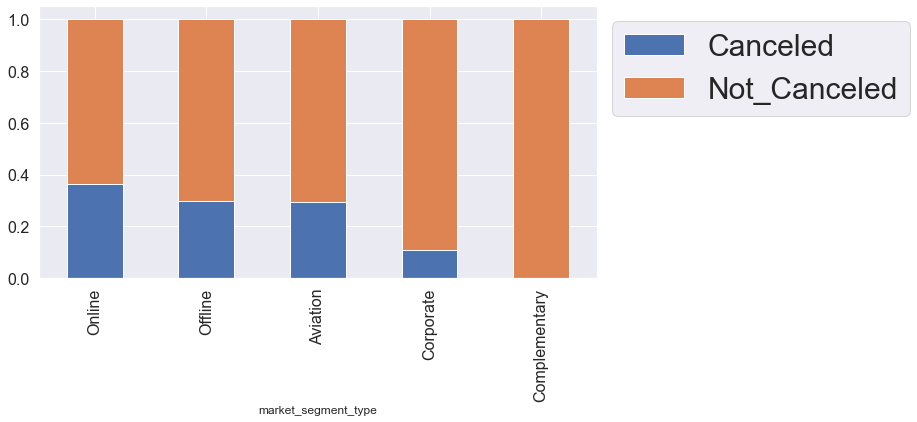

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(data, "market_segment_type", "booking_status", 1)

- Complementary market segment has no cancellations
- Corporate market segment has the second least cancellations
- Online market segment has the most cancellations

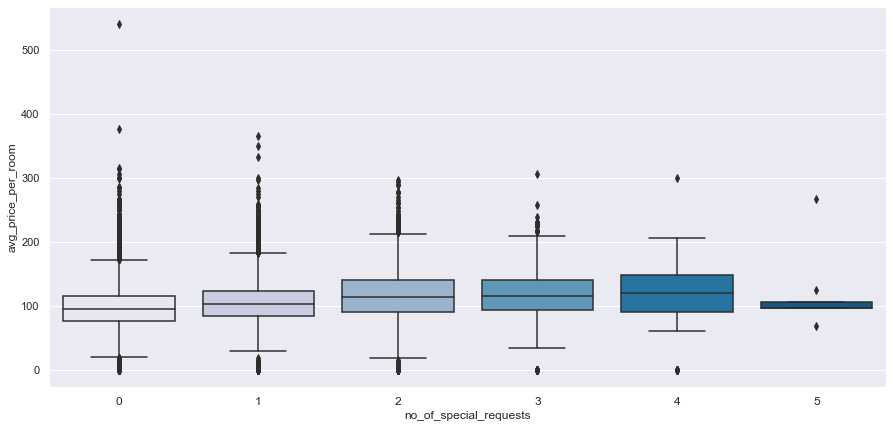

<IPython.core.display.Javascript object>

In [42]:
boxplot_chart(data, "no_of_special_requests", "avg_price_per_room")

- The number of special requirements increase the average price per room

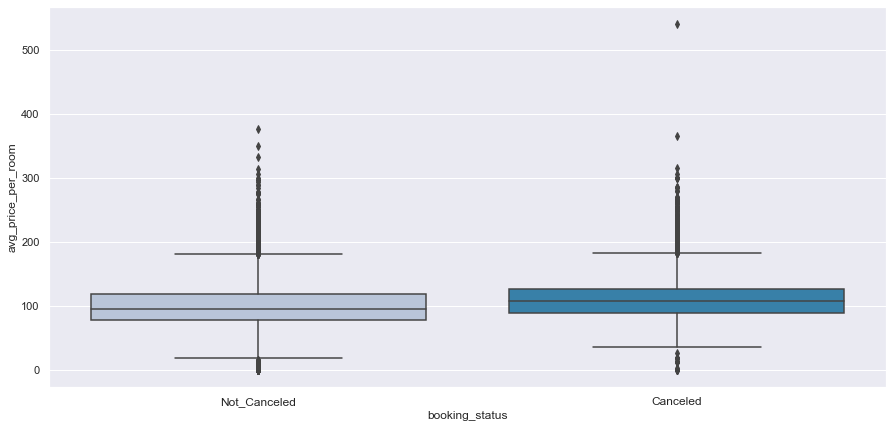

<IPython.core.display.Javascript object>

In [43]:
boxplot_chart(data, "booking_status", "avg_price_per_room")

- Higher price rooms is more likely to get cancelled than fair priced rooms

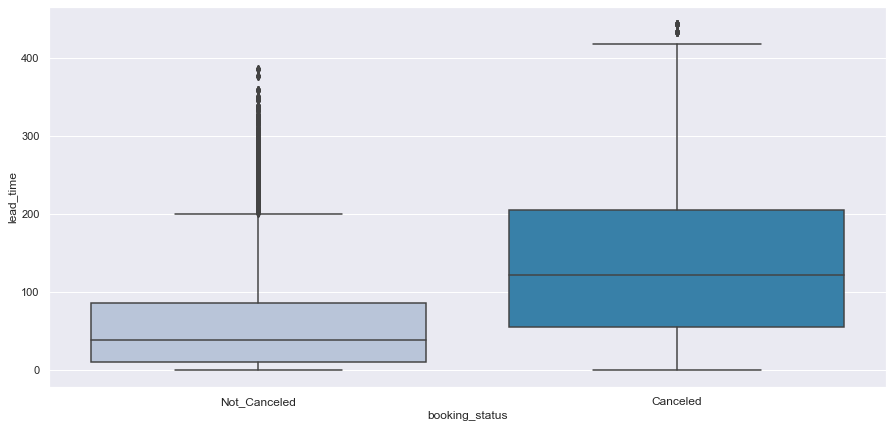

<IPython.core.display.Javascript object>

In [44]:
boxplot_chart(data, "booking_status", "lead_time")

- The longer the lead time the greater chance that the booking will be cancelled

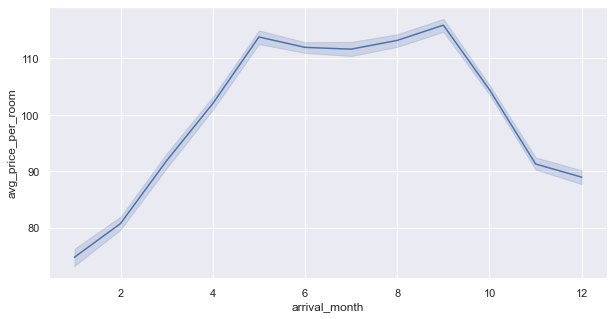

<IPython.core.display.Javascript object>

In [45]:
lineplot_chart(data, "arrival_month", "avg_price_per_room")

- Summer months have a higher price per room than the winter months

# Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [46]:
# Making a copy of dataframe "data" and call it "df".  We will be modifying this dataframe
df = data.copy()

<IPython.core.display.Javascript object>

In [47]:
# Checking missing variables that we need to treat
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

In [48]:
# encode booking status to "canceled"=1 and "Not_Canceled"=0
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)


<IPython.core.display.Javascript object>

In [49]:
# Create dummies for the category columns in the dataset
df = pd.get_dummies(
    df,
    columns=["type_of_meal_plan", "room_type_reserved", "market_segment_type"],
    drop_first=True,
)

<IPython.core.display.Javascript object>

In [50]:
# Information on new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

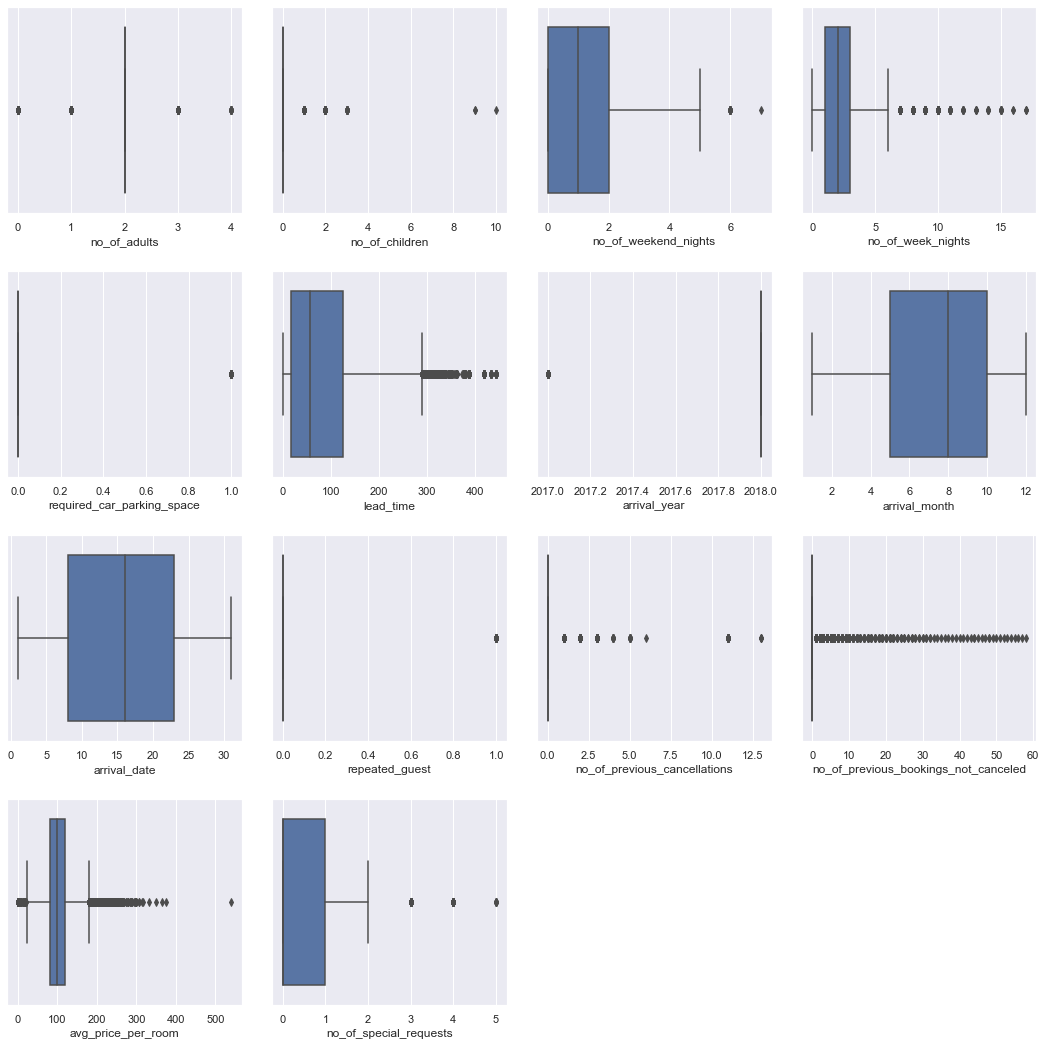

<IPython.core.display.Javascript object>

In [51]:
# EDA after manipulating the datset
num_cols = df.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status and dummy variables
del num_cols[14:]

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

## Split Data

In [52]:
# Split into X=Predictor and Y=Predicted
X = df.drop("booking_status", axis=1)
Y = df["booking_status"]

<IPython.core.display.Javascript object>

In [53]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [54]:
# 70% Training and 30% Testing split on dataset
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [55]:
# Checking the Split on dataset
print("{0:0.1f}% data is in training set".format((len(x_train) / len(df.index)) * 100))
print("{0:0.1f}% data is in test set".format((len(x_test) / len(df.index)) * 100))

70.0% data is in training set
30.0% data is in test set


<IPython.core.display.Javascript object>

In [56]:
# Checking that the weights of y_train and y_test did not change
print("Y variable weights:")
print(Y.value_counts(normalize=True))
print("-" * 50)
print("y_train variable weights:")
print(y_train.value_counts(normalize=True))
print("-" * 50)
print("y_test variable weights:")
print(y_test.value_counts(normalize=True))

Y variable weights:
0    0.672364
1    0.327636
Name: booking_status, dtype: float64
--------------------------------------------------
y_train variable weights:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
--------------------------------------------------
y_test variable weights:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [57]:
# Checking the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                   3.959545e+07
no_of_adults                            1.345059e+00
no_of_children                          2.007213e+00
no_of_weekend_nights                    1.067255e+00
no_of_week_nights                       1.094373e+00
required_car_parking_space              1.034943e+00
lead_time                               1.401920e+00
arrival_year                            1.433261e+00
arrival_month                           1.277398e+00
arrival_date                            1.007629e+00
repeated_guest                          1.750194e+00
no_of_previous_cancellations            1.322011e+00
no_of_previous_bookings_not_canceled    1.570863e+00
avg_price_per_room                      2.032631e+00
no_of_special_requests                  1.247233e+00
type_of_meal_plan_Meal Plan 2           1.261818e+00
type_of_meal_plan_Meal Plan 3           1.007964e+00
type_of_meal_plan_Not Selected          1.279209e+00
room_type_reserved_Room_Type 2  

<IPython.core.display.Javascript object>

- **There is multicollinearity with the "market_segment_type_Online" and "market_segment_type_Offline"**

In [58]:
col_to_drop = "market_segment_type_Online"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

vif_series2 = pd.Series(
    [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])],
    index=x_train2.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                                   3.951065e+07
no_of_adults                            1.328675e+00
no_of_children                          2.006306e+00
no_of_weekend_nights                    1.066891e+00
no_of_week_nights                       1.093767e+00
required_car_parking_space              1.034859e+00
lead_time                               1.397513e+00
arrival_year                            1.430535e+00
arrival_month                           1.276289e+00
arrival_date                            1.007598e+00
repeated_guest                          1.747050e+00
no_of_previous_cancellations            1.321916e+00
no_of_previous_bookings_not_canceled    1.570529e+00
avg_price_per_room                      2.031834e+00
no_of_special_requests                  1.242437e+00
type_of_meal_plan_Meal Plan 2           1.261488e+00
type_of_meal_plan_Meal Plan 3           1.007964e+00
type_of_meal_plan_Not Selected          1.277105e+00
room_type_reserved_Room_Type 2  

<IPython.core.display.Javascript object>

- **Removing "market_segment_type_Online" fixes the multicollinearity with "market_segment_type_Offline"**

## Building a Logistic Regression model

In [59]:
# fitting the model on training set
logit = sm.Logit(y_train, x_train2.astype(float))
lg = logit.fit(disp=False)

<IPython.core.display.Javascript object>

In [60]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.3322
Time:                        14:53:50   Log-Likelihood:                -10724.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -886.7986    121.191     -7.317      0.000   -1124.329    -649.268
no_of_adults                             0.0334      

<IPython.core.display.Javascript object>

- **There is high p-value variables that can be removed with p-value > 0.05**

In [61]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [62]:
# New x_train and x_test selected features for p < 0.05
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [63]:
# fitting the model on training set
logit2 = sm.Logit(y_train, x_train3.astype(float))
lg2 = logit2.fit(disp=False)

<IPython.core.display.Javascript object>

In [64]:
# let's print the new logistic regression summary
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.3312
Time:                        14:53:51   Log-Likelihood:                -10741.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -869.8889    120.911     -7.194      0.000   -1106.870    -632.908
no_of_weekend_nights               0.1498      0.020      7.568      0.

<IPython.core.display.Javascript object>

- **Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final ones and lg2 as final model.**

### Coefficient Interpretations

* Coefficient of no_of_weekend_nights, no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room, and type_of_meal_plan are positive.  Increase in these will lead to increase in chances of the booking of being canceled. 

* Coefficient of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, room_type_reserved, and market_segment_type are negative.  Increase in these will lead to decrease in chances of the booking of being canceled.

## Model performance evaluation

In [65]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [66]:
# Showing the Logistic Regression model performance training dataset
lg2_train_perf = model_performance_classification_statsmodels(lg2, x_train3, y_train)

print("Training performance:")
lg2_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.806593  0.632528    0.73946  0.681827

<IPython.core.display.Javascript object>

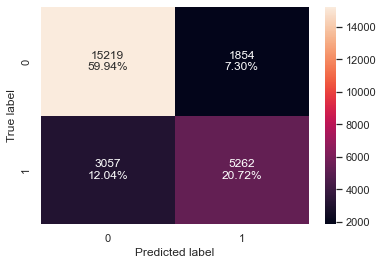

<IPython.core.display.Javascript object>

In [67]:
# Showing the confusion matrix on the Logistic Regression Model training dataset
confusion_matrix_statsmodels(lg2, x_train3, y_train)

In [68]:
# Showing the Logistic Regression model performance test dataset
lg2_test_perf = model_performance_classification_statsmodels(lg2, x_test3, y_test)

print("Testing performance:")
lg2_test_perf

Testing performance:


Accuracy    Recall  Precision        F1
0   0.80272  0.626192   0.732852  0.675336

<IPython.core.display.Javascript object>

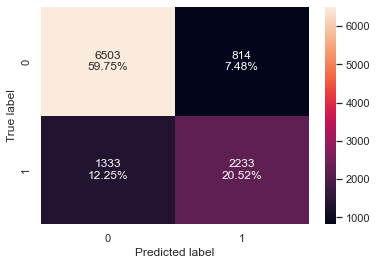

<IPython.core.display.Javascript object>

In [69]:
# Showing the confusion matrix on the Logistic Regression Model test dataset
confusion_matrix_statsmodels(lg2, x_test3, y_test)

- **The Logistic Regression Model is not overfitting the training dataset because the performance of the testing dataset is about the same.  This is good.**
- **The Accuracy is 80.3% but the Recall score is only 62.6%.  We will see if we can improve the Recall performance by changing the classification threshold.**
-  **Recall score is the most important measurement because our model predicted that the customer would not cancel their booking but did cancel.  This is expensive for the hotel because they did not anticipate this where Precision score is more of a benefit when predicting booking cancellation but customer didn't cancel.**

## Model Performance Improvement

### ROC Curve and ROC-AUC

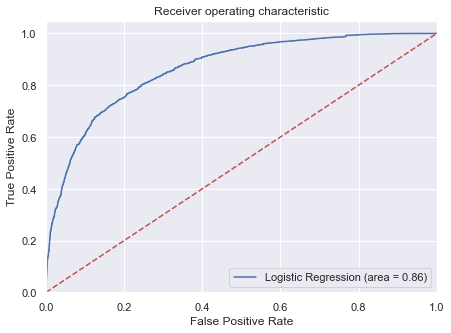

<IPython.core.display.Javascript object>

In [70]:
# ROC-AUC on training dataset
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(x_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(x_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- **Area under the curve is 86%.**

In [71]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(x_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3329571917391473


<IPython.core.display.Javascript object>

In [72]:
# Checking Logistic Regression Model performance for this threshold on training dataset
lg2_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, x_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
lg2_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.784342  0.766078   0.643542  0.699484

<IPython.core.display.Javascript object>

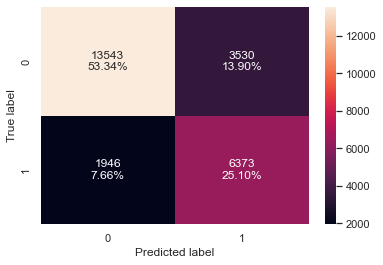

<IPython.core.display.Javascript object>

In [73]:
# Showing the confusion matrix on the Logistic Regression Model for this threshold on training dataset
confusion_matrix_statsmodels(
    lg2, x_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [74]:
# Checking Logistic Regression Model performance for this threshold on test dataset
lg2_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, x_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Testing performance:")
lg2_test_perf_threshold_auc_roc

Testing performance:


Accuracy    Recall  Precision        F1
0  0.778462  0.766125   0.634022  0.693841

<IPython.core.display.Javascript object>

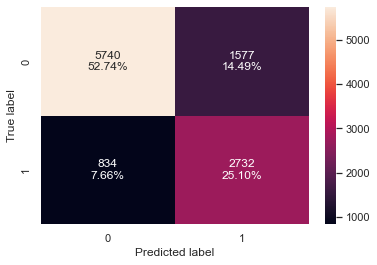

<IPython.core.display.Javascript object>

In [75]:
# Showing the confusion matrix on the Logistic Regression Model for this threshold on test dataset
confusion_matrix_statsmodels(lg2, x_test3, y_test, threshold=optimal_threshold_auc_roc)

- **Recall score increase to 76.6% which is good.  Our Logistic Regression Model is preforming better.**

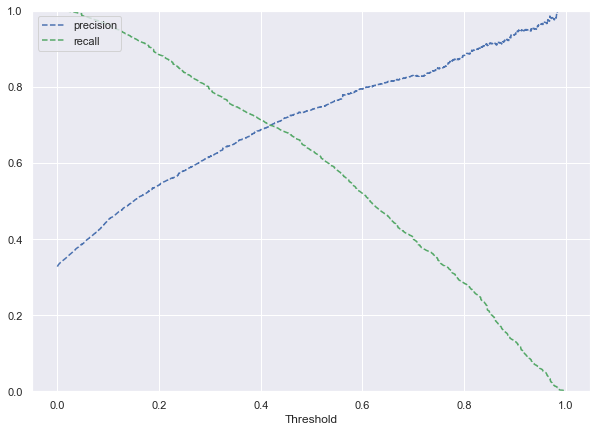

<IPython.core.display.Javascript object>

In [76]:
# Showing the Precision-Recall Curve
y_scores = lg2.predict(x_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- **At the threshold of 0.42, we get balanced recall and precision.**

In [77]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

In [78]:
# Checking Logistic Regression Model performance for this threshold on training dataset
lg2_train_perf_balanced_threshold = model_performance_classification_statsmodels(
    lg2, x_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
lg2_train_perf_balanced_threshold

Training performance:


Accuracy    Recall  Precision        F1
0  0.802654  0.698642   0.698894  0.698768

<IPython.core.display.Javascript object>

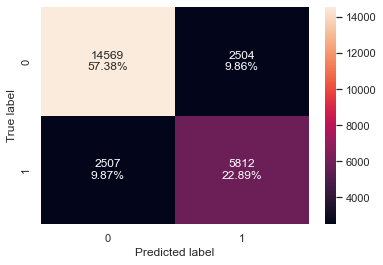

<IPython.core.display.Javascript object>

In [79]:
# Showing the confusion matrix on the Logistic Regression Model for this threshold on training dataset
confusion_matrix_statsmodels(lg2, x_train3, y_train, threshold=optimal_threshold_curve)

In [80]:
# Checking Logistic Regression Model performance for this threshold on test dataset
lg2_test_perf_balanced_threshold = model_performance_classification_statsmodels(
    lg2, x_test3, y_test, threshold=optimal_threshold_curve
)
print("Testing performance:")
lg2_test_perf_balanced_threshold

Testing performance:


Accuracy    Recall  Precision        F1
0  0.796563  0.694055   0.687882  0.690955

<IPython.core.display.Javascript object>

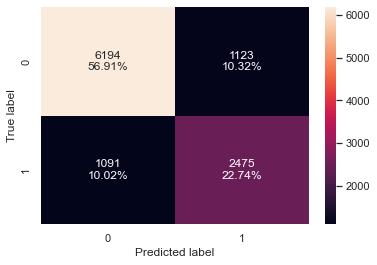

<IPython.core.display.Javascript object>

In [81]:
# Showing the confusion matrix on the Logistic Regression Model for this threshold on test dataset
confusion_matrix_statsmodels(lg2, x_test3, y_test, threshold=optimal_threshold_curve)

## Final Model Summary

In [82]:
# Training performance comparison
models_train_comp_df = pd.concat(
    [
        lg2_train_perf.T,
        lg2_train_perf_balanced_threshold.T,
        lg2_train_perf_threshold_auc_roc.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.42 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.806593   
Recall                                        0.632528   
Precision                                     0.739460   
F1                                            0.681827   

           Logistic Regression-0.42 Threshold  \
Accuracy                             0.802654   
Recall                               0.698642   
Precision                            0.698894   
F1                                   0.698768   

           Logistic Regression-0.33 Threshold  
Accuracy                             0.784342  
Recall                               0.766078  
Precision                            0.643542  
F1                                   0.699484

<IPython.core.display.Javascript object>

In [83]:
# Testing performance comparison
models_test_comp_df = pd.concat(
    [
        lg2_test_perf.T,
        lg2_test_perf_balanced_threshold.T,
        lg2_test_perf_threshold_auc_roc.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.42 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.802720   
Recall                                        0.626192   
Precision                                     0.732852   
F1                                            0.675336   

           Logistic Regression-0.42 Threshold  \
Accuracy                             0.796563   
Recall                               0.694055   
Precision                            0.687882   
F1                                   0.690955   

           Logistic Regression-0.33 Threshold  
Accuracy                             0.778462  
Recall                               0.766125  
Precision                            0.634022  
F1                                   0.693841

<IPython.core.display.Javascript object>

- **All three Logistic Regression Models are performing well on both training and test data without the problem of overfitting.**
- **The Logistic Regression Model with threshold (0.33) is giving the best Recall and F1 score. Therefore it is selected as the final model.**
- **The final Logistic Regression Model has an Accuracy of 77.8% and a good Recall score of 76.6% on test data.**
- **Recall score is the most important measurement because it is expensive for the hotel not to anticipate booking cancellations.**

## Building a Decision Tree model

In [84]:
# Creating the decision tree model
dTree = DecisionTreeClassifier(criterion="entropy", random_state=1)
dTree.fit(x_train3, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

<IPython.core.display.Javascript object>

In [85]:
# Showing the Decision Tree model performance training dataset
dTree_train_perf = model_performance_classification_statsmodels(
    dTree, x_train3, y_train
)

print("Training performance:")
dTree_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.993147  0.983532   0.995498  0.989479

<IPython.core.display.Javascript object>

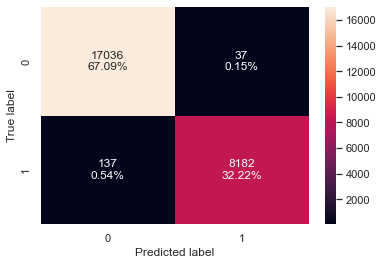

<IPython.core.display.Javascript object>

In [86]:
# Showing the confusion matrix on the Decision Tree model training dataset
confusion_matrix_statsmodels(dTree, x_train3, y_train)

In [87]:
# Showing the Decision Tree model performance test dataset
dTree_test_perf = model_performance_classification_statsmodels(dTree, x_test3, y_test)

print("Testing performance:")
dTree_test_perf

Testing performance:


Accuracy    Recall  Precision        F1
0  0.868143  0.802019   0.796879  0.799441

<IPython.core.display.Javascript object>

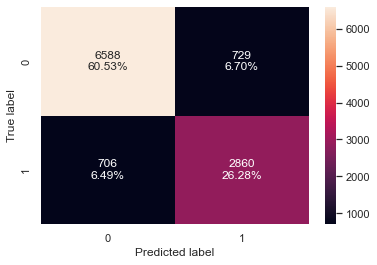

<IPython.core.display.Javascript object>

In [88]:
# Showing the confusion matrix on the Decision Tree model test dataset
confusion_matrix_statsmodels(dTree, x_test3, y_test)

- **The Decision Tree model is overfitting the training dataset because the performance of the training is almost 100% but testing is about 86%.**
- **We will see if we can improve the performance of the Decision Tree model by pruning the tree.**
-  **Recall score is the most important measurement because our model predicted that the customer would not cancel their booking but did cancel.  This is expensive for the hotel because they did not anticipate this through our model.**

## Visualizing the Decision Tree

In [89]:
# Creating feature names
feature_names = list(x_train3.columns)
print(feature_names)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

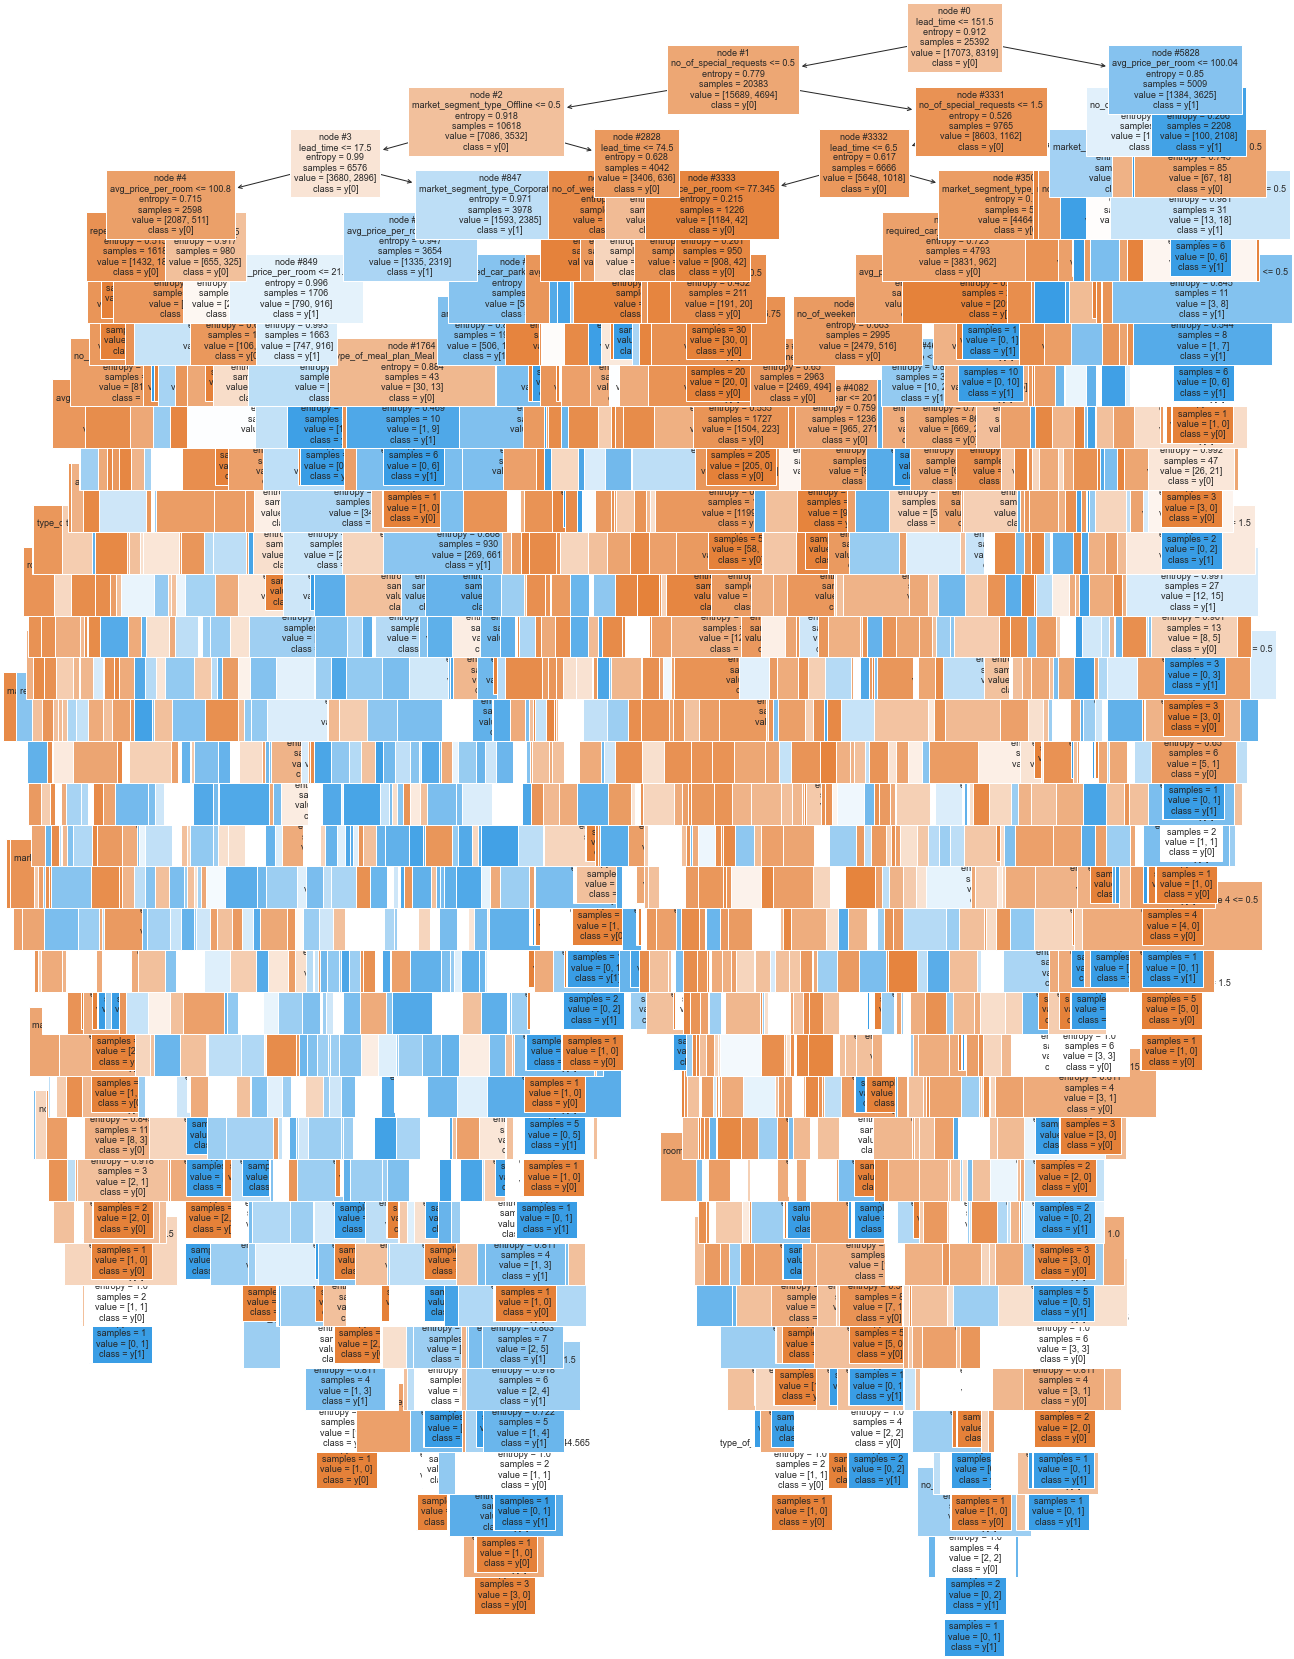

<IPython.core.display.Javascript object>

In [90]:
# Showing the Decision Tree
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

## Do we need to prune the tree?

- **Yes, we need to prune the tree.**

#### Using GridSearch to find best pruning of the Decision tree model

In [91]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train3, y_train)

# Set the clf to the best combination of parameters
dTree_pre_prune = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dTree_pre_prune.fit(x_train3, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.01, random_state=1)

<IPython.core.display.Javascript object>

In [92]:
# Showing the Pre-Pruned Decision Tree model performance training dataset
dTree_pre_prune_train_perf = model_performance_classification_statsmodels(
    dTree_pre_prune, x_train3, y_train
)

print("Training performance:")
dTree_pre_prune_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.793754  0.720279   0.673107  0.695895

<IPython.core.display.Javascript object>

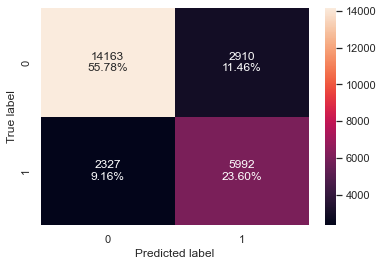

<IPython.core.display.Javascript object>

In [93]:
# Showing the confusion matrix on the Pre-Pruned Decision Tree model training dataset
confusion_matrix_statsmodels(dTree_pre_prune, x_train3, y_train)

In [94]:
# Showing the Pre-Pruned Decision Tree model performance test dataset
dTree_pre_prune_test_perf = model_performance_classification_statsmodels(
    dTree_pre_prune, x_test3, y_test
)

print("Testing performance:")
dTree_pre_prune_test_perf

Testing performance:


Accuracy    Recall  Precision        F1
0  0.791693  0.713965   0.671236  0.691942

<IPython.core.display.Javascript object>

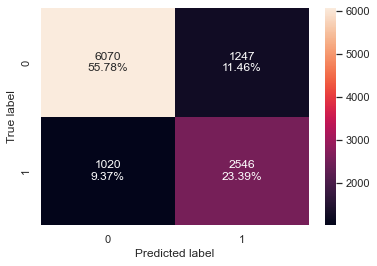

<IPython.core.display.Javascript object>

In [95]:
# Showing the confusion matrix on the Pre-Pruned Decision Tree model test dataset
confusion_matrix_statsmodels(dTree_pre_prune, x_test3, y_test)

- **The Pre-Pruned Decision Tree model is not overfitting the training dataset now because the performance of the testing dataset is about the same. This is good.**
-  **Recall score is the most important measurement because our model predicted that the customer would not cancel their booking but did cancel.  This is expensive for the hotel because they did not anticipate this through our model.**

## Visualizing the Pre-Pruned Decision Tree

In [96]:
# Creating feature names
feature_names = list(x_train3.columns)
print(feature_names)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

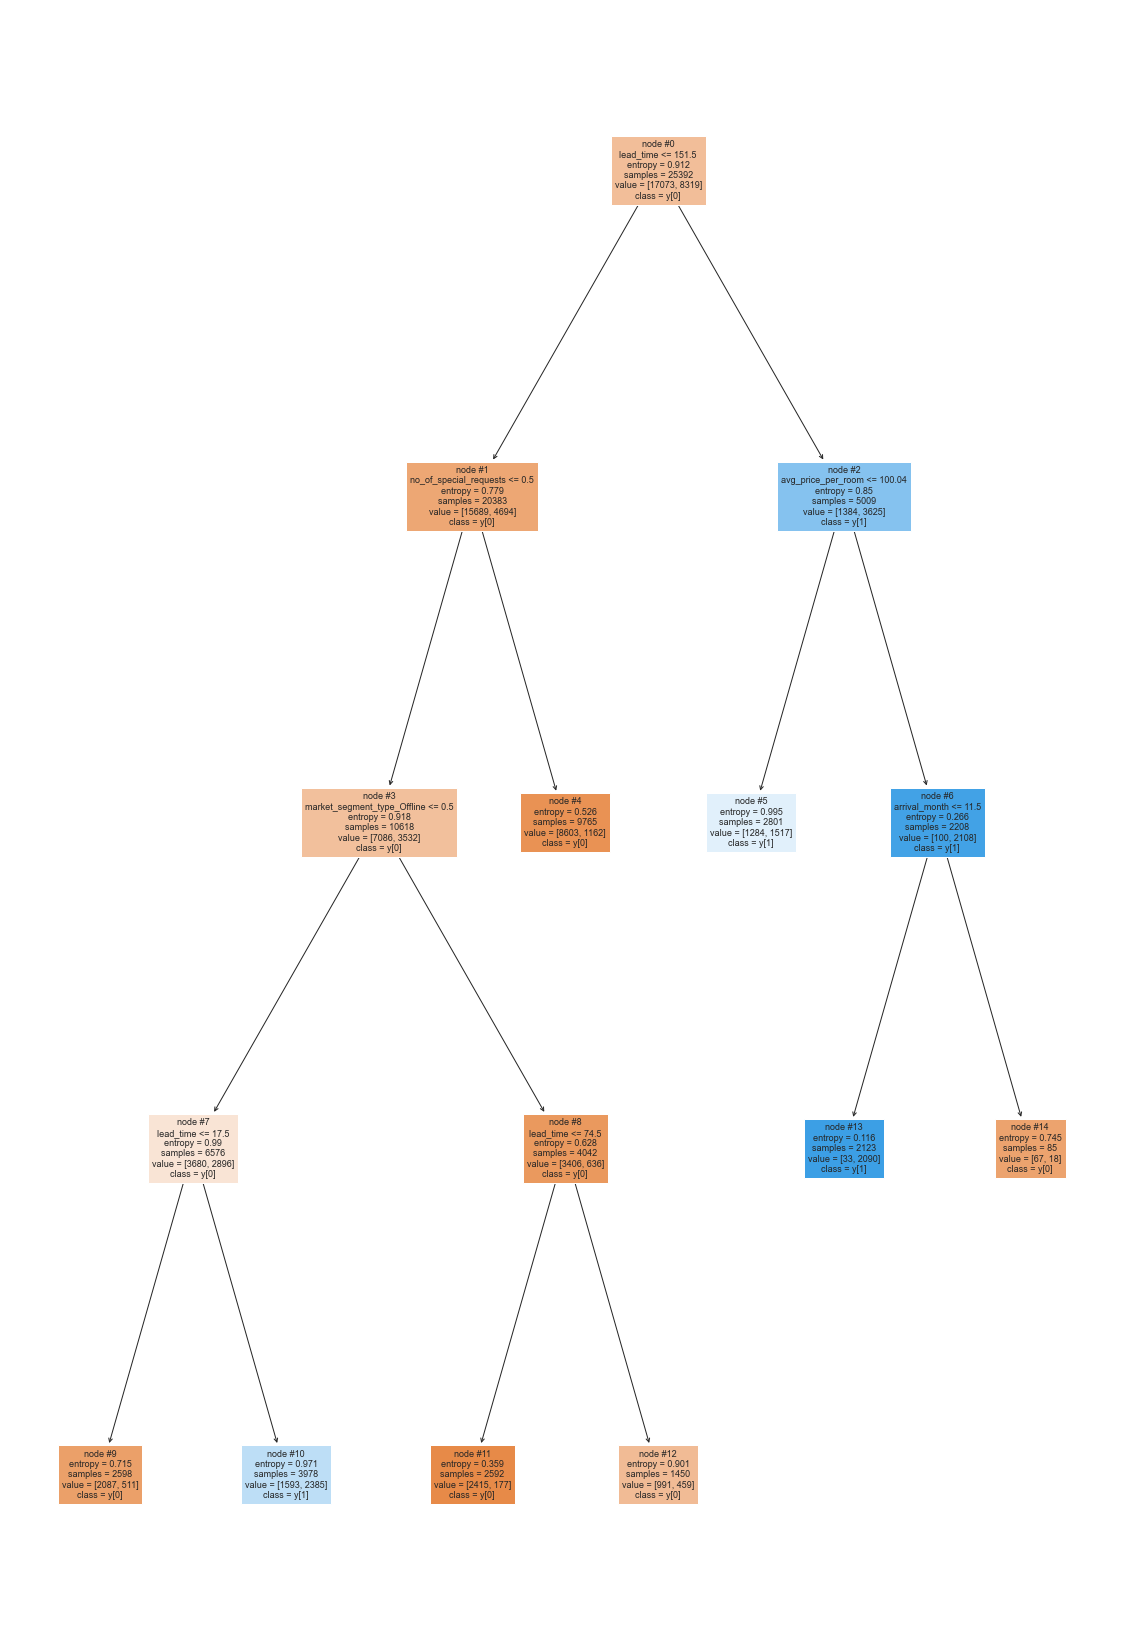

<IPython.core.display.Javascript object>

In [97]:
# Showing the Pre-Pruned Decision Tree
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree_pre_prune,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [98]:
# Text report showing the rules of a decision tree -
print(tree.export_text(dTree_pre_prune, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 17.50
|   |   |   |   |--- weights: [2087.00, 511.00] class: 0
|   |   |   |--- lead_time >  17.50
|   |   |   |   |--- weights: [1593.00, 2385.00] class: 1
|   |   |--- market_segment_type_Offline >  0.50
|   |   |   |--- lead_time <= 74.50
|   |   |   |   |--- weights: [2415.00, 177.00] class: 0
|   |   |   |--- lead_time >  74.50
|   |   |   |   |--- weights: [991.00, 459.00] class: 0
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [8603.00, 1162.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1284.00, 1517.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [33.00, 2090.00] class: 1
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [67.00, 18.00] class: 0



<IPython.core.display.Javascript object>

In [99]:
# Importance of features in the Pre-Pruned Decision Tree model
print(
    pd.DataFrame(
        dTree_pre_prune.feature_importances_, columns=["Imp"], index=x_train3.columns
    ).sort_values(by="Imp", ascending=False)
)

                                     Imp
lead_time                       0.592069
no_of_special_requests          0.141165
avg_price_per_room              0.126916
market_segment_type_Offline     0.099895
arrival_month                   0.039955
required_car_parking_space      0.000000
arrival_year                    0.000000
repeated_guest                  0.000000
no_of_previous_cancellations    0.000000
no_of_week_nights               0.000000
no_of_weekend_nights            0.000000
type_of_meal_plan_Meal Plan 2   0.000000
type_of_meal_plan_Not Selected  0.000000
room_type_reserved_Room_Type 2  0.000000
room_type_reserved_Room_Type 4  0.000000
room_type_reserved_Room_Type 5  0.000000
room_type_reserved_Room_Type 6  0.000000
room_type_reserved_Room_Type 7  0.000000
market_segment_type_Corporate   0.000000
const                           0.000000


<IPython.core.display.Javascript object>

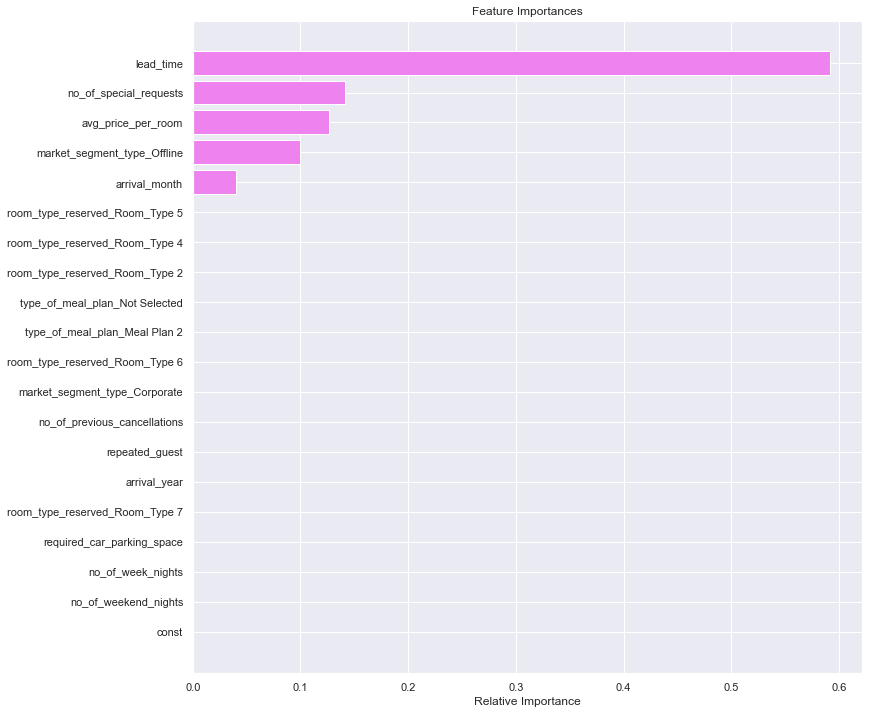

<IPython.core.display.Javascript object>

In [100]:
# Showing the importance of features in the Pre-Pruned Decision Tree model as a chart
importances = dTree_pre_prune.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- **Lead_time is by far the most important factor in determining whether booking will be canceled.  Followed by no_of_special_requests, avg_price_per_room, market_segment_type_Offline, and arrival_month.**

## Cost Complexity Pruning (Post-Pruning)

In [101]:
# Cost complexity pruning
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(x_train3, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [102]:
# Display the ccp_alphas and impurities
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.009761
1    -8.131516e-20    0.009761
2     2.926260e-20    0.009761
3     2.926260e-20    0.009761
4     2.926260e-20    0.009761
...            ...         ...
1704  8.542012e-03    0.334841
1705  9.377225e-03    0.344218
1706  2.168544e-02    0.387589
1707  3.035184e-02    0.417941
1708  8.205938e-02    0.500000

[1709 rows x 2 columns]

<IPython.core.display.Javascript object>

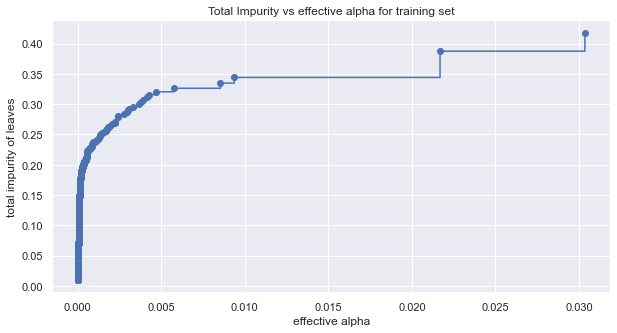

<IPython.core.display.Javascript object>

In [103]:
# Shows Total Impurity vs effective alpha for training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [104]:
# We train a decision tree using the effective alphas.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(x_train3, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08205938055990608


<IPython.core.display.Javascript object>

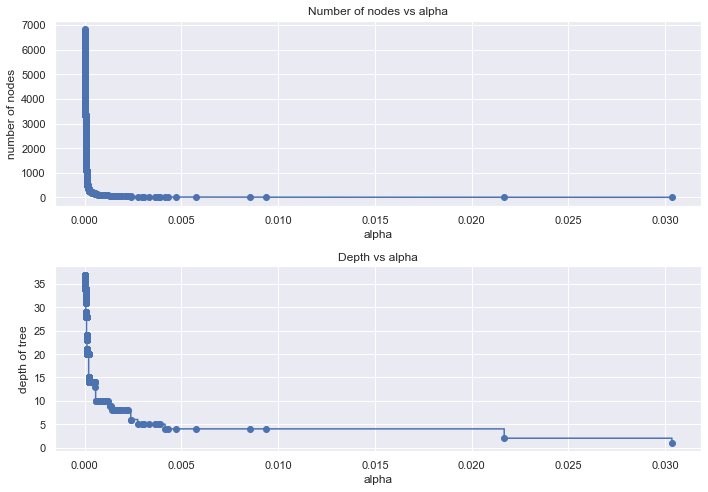

<IPython.core.display.Javascript object>

In [105]:
# For the remainder, we remove the last element in clfs and ccp_alphas
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Recall vs alpha for training and testing sets

In [106]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train3)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [107]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test3)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

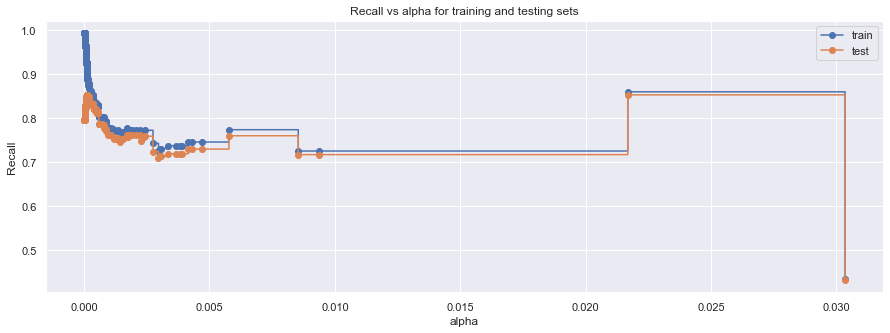

<IPython.core.display.Javascript object>

In [108]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [109]:
# creating the model where we get highest train and test recall score
index_best_model = np.argmax(recall_test)
dTree_post_prune_recall = clfs[index_best_model]
print(dTree_post_prune_recall)

DecisionTreeClassifier(ccp_alpha=9.946780651043656e-05, class_weight='balanced',
                       random_state=1)


<IPython.core.display.Javascript object>

In [110]:
# Showing the Post-Pruned Decision Tree model performance training dataset for best recall score
dTree_post_prune_train_perf_recall = model_performance_classification_statsmodels(
    dTree_post_prune_recall, x_train3, y_train
)

print("Training performance:")
dTree_post_prune_train_perf_recall

Training performance:


Accuracy    Recall  Precision        F1
0  0.906033  0.926193   0.813021  0.865925

<IPython.core.display.Javascript object>

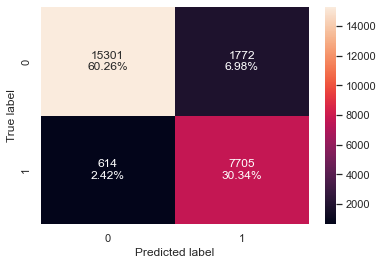

<IPython.core.display.Javascript object>

In [111]:
# Showing the confusion matrix on the Post-Pruned Decision Tree model training dataset for best recall score
confusion_matrix_statsmodels(dTree_post_prune_recall, x_train3, y_train)

In [112]:
# Showing the Post-Pruned Decision Tree model performance test dataset for best recall score
dTree_post_prune_test_perf_recall = model_performance_classification_statsmodels(
    dTree_post_prune_recall, x_test3, y_test
)

print("Testing performance:")
dTree_post_prune_test_perf_recall

Testing performance:


Accuracy    Recall  Precision        F1
0  0.859689  0.853898   0.751666  0.799527

<IPython.core.display.Javascript object>

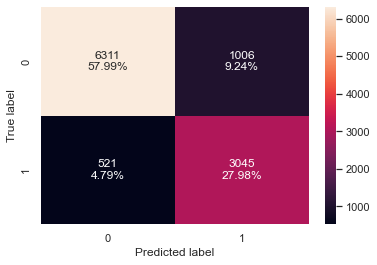

<IPython.core.display.Javascript object>

In [113]:
# Showing the confusion matrix on the Post-Pruned Decision Tree model test dataset for best recall score
confusion_matrix_statsmodels(dTree_post_prune_recall, x_test3, y_test)

- **The Post-Pruned Decision Tree model for best Recall score is overfitting the training dataset.  We will try for best f1 score and see if we can get better results on performance.**

## F1 Score vs alpha for training and testing sets

In [114]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(x_train3)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

<IPython.core.display.Javascript object>

In [115]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(x_test3)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

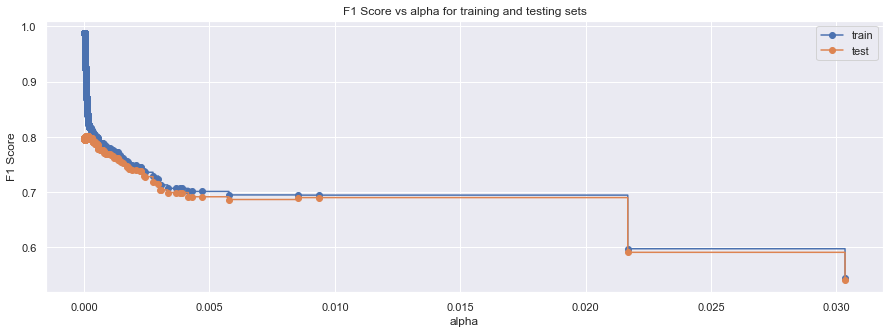

<IPython.core.display.Javascript object>

In [116]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [117]:
# creating the model where we get highest train and test f1 score
index_best_model = np.argmax(f1_test)
dTree_post_prune_f1 = clfs[index_best_model]
print(dTree_post_prune_f1)

DecisionTreeClassifier(ccp_alpha=0.0001392515069418836, class_weight='balanced',
                       random_state=1)


<IPython.core.display.Javascript object>

In [118]:
# Showing the Post-Pruned Decision Tree model performance training dataset for best f1 score
dTree_post_prune_train_perf_f1 = model_performance_classification_statsmodels(
    dTree_post_prune_f1, x_train3, y_train
)

print("Training performance:")
dTree_post_prune_train_perf_f1

Training performance:


Accuracy    Recall  Precision        F1
0   0.88839  0.879192   0.799956  0.837705

<IPython.core.display.Javascript object>

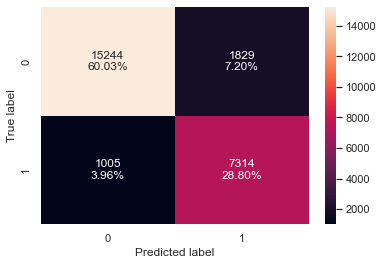

<IPython.core.display.Javascript object>

In [119]:
# Showing the confusion matrix on the Post-Pruned Decision Tree model training dataset for best f1 score
confusion_matrix_statsmodels(dTree_post_prune_f1, x_train3, y_train)

In [120]:
# Showing the Post-Pruned Decision Tree model performance test dataset for best f1 score
dTree_post_prune_test_perf_f1 = model_performance_classification_statsmodels(
    dTree_post_prune_f1, x_test3, y_test
)

print("Testing performance:")
dTree_post_prune_test_perf_f1

Testing performance:


Accuracy    Recall  Precision        F1
0  0.864468  0.839596   0.768283  0.802358

<IPython.core.display.Javascript object>

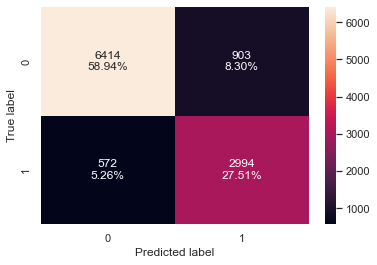

<IPython.core.display.Javascript object>

In [121]:
# Showing the confusion matrix on the Post-Pruned Decision Tree model test dataset for best f1 score
confusion_matrix_statsmodels(dTree_post_prune_f1, x_test3, y_test)

- **The Post-Pruned Decision Tree model for best f1 score is not overfitting the training dataset now because the performance of the testing dataset is about the same. This is our best model!**

## Visualizing the Post-Pruned Decision Tree

In [122]:
# Creating feature names
feature_names = list(x_train3.columns)
print(feature_names)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

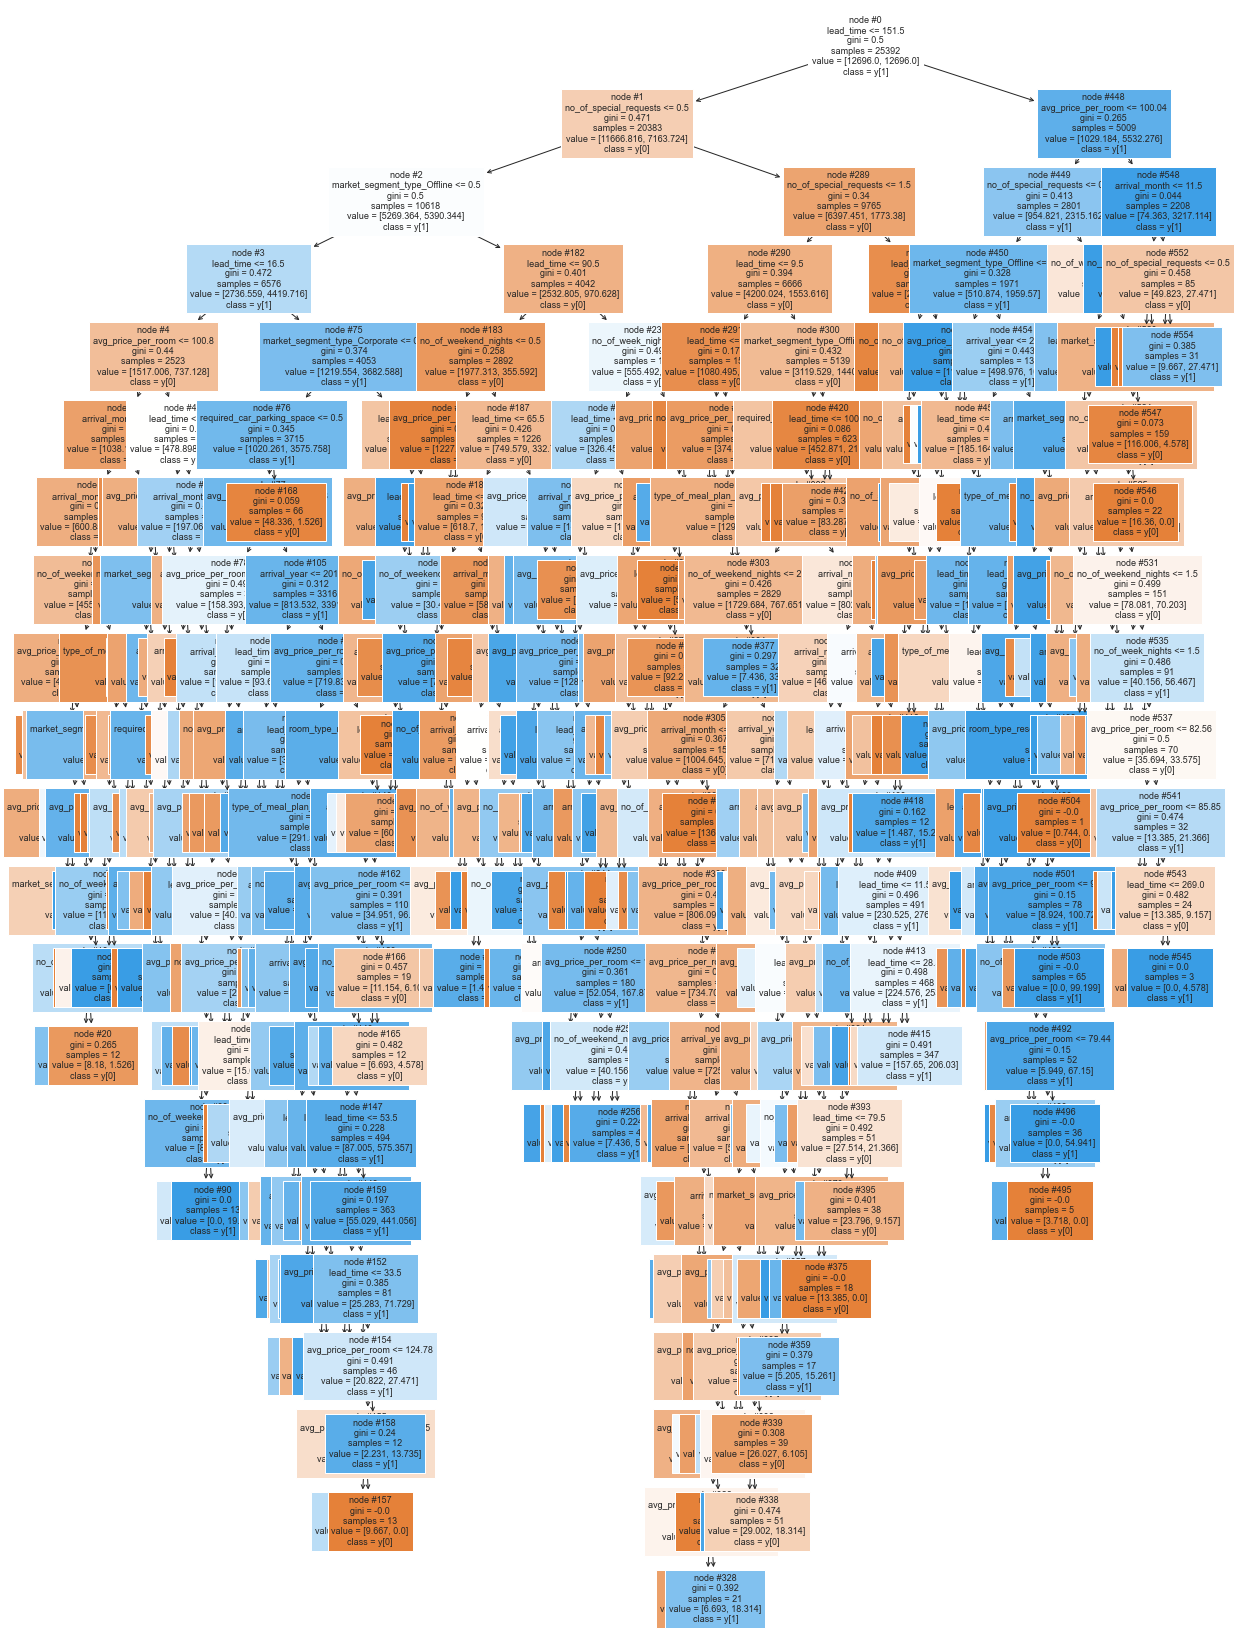

<IPython.core.display.Javascript object>

In [123]:
# Showing the Post-Pruned Decision Tree for best f1 score
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree_post_prune_f1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [124]:
# Text report showing the rules of a decision tree for best f1 score
print(
    tree.export_text(
        dTree_post_prune_f1, feature_names=feature_names, show_weights=True
    )
)

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 16.50
|   |   |   |   |--- avg_price_per_room <= 100.80
|   |   |   |   |   |--- arrival_month <= 8.50
|   |   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |   |--- weights: [145.01, 0.00] class: 0
|   |   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 74.90
|   |   |   |   |   |   |   |   |   |--- weights: [152.44, 12.21] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  74.90
|   |   |   |   |   |   |   |   |   |--- lead_time <= 8.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 90.65
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [127.90, 59.52] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  90.65
|   |   |   |   |   |   |   | 

<IPython.core.display.Javascript object>

In [125]:
# Importance of features in the Post-Pruned Decision Tree model for best f1 score
print(
    pd.DataFrame(
        dTree_post_prune_f1.feature_importances_,
        columns=["Imp"],
        index=x_train3.columns,
    ).sort_values(by="Imp", ascending=False)
)

                                     Imp
lead_time                       0.457413
no_of_special_requests          0.134039
avg_price_per_room              0.127332
market_segment_type_Offline     0.091772
arrival_month                   0.063440
no_of_weekend_nights            0.040647
no_of_week_nights               0.022394
arrival_year                    0.022067
market_segment_type_Corporate   0.017806
required_car_parking_space      0.010804
type_of_meal_plan_Meal Plan 2   0.008460
type_of_meal_plan_Not Selected  0.001838
repeated_guest                  0.001197
room_type_reserved_Room_Type 5  0.000624
room_type_reserved_Room_Type 4  0.000167
no_of_previous_cancellations    0.000000
room_type_reserved_Room_Type 2  0.000000
room_type_reserved_Room_Type 6  0.000000
room_type_reserved_Room_Type 7  0.000000
const                           0.000000


<IPython.core.display.Javascript object>

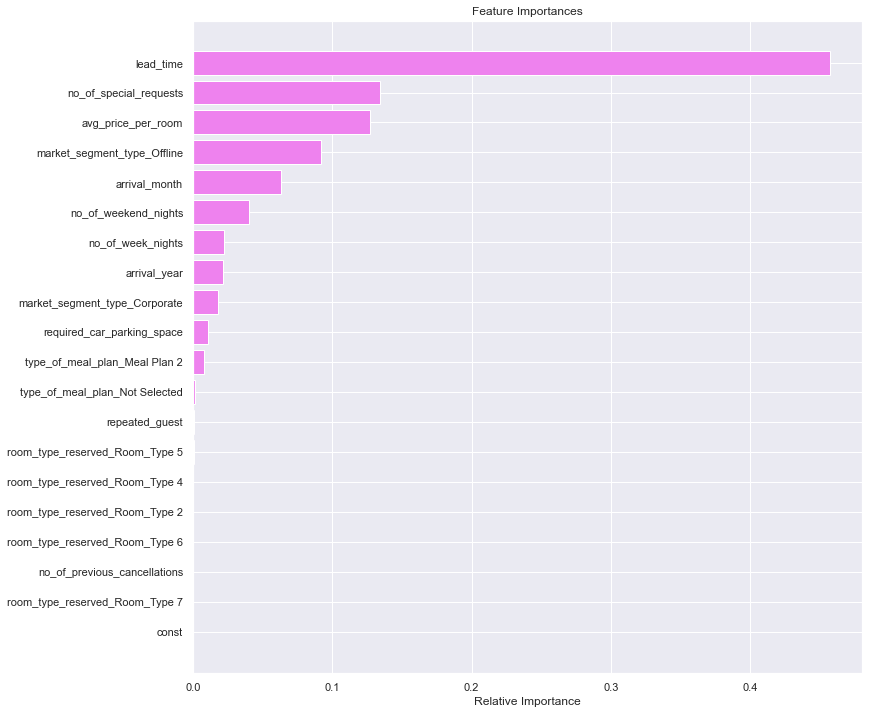

<IPython.core.display.Javascript object>

In [126]:
# Showing the importance of features in the Post-Pruned Decision Tree model as a chart for best f1 score
importances = dTree_post_prune_f1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- **Lead_time is by far the most important factor in determining whether booking will be canceled.  Followed by no_of_special_requests, avg_price_per_room, market_segment_type_Offline, arrival_month, no_of_weekend_nights, no_of_week_nights, arrival_year, market_segment_type_Corporate, required_car_parking_space, and type_of_meal_plan_Meal Plan 2.**

## Model Performance Comparison and Conclusions

In [127]:
# Final training performance comparison
models_train_comp_df2 = pd.concat(
    [
        lg2_train_perf_threshold_auc_roc.T,
        dTree_train_perf.T,
        dTree_pre_prune_train_perf.T,
        dTree_post_prune_train_perf_recall.T,
        dTree_post_prune_train_perf_f1.T,
    ],
    axis=1,
)
models_train_comp_df2.columns = [
    "Logistic Regression-0.33 Threshold",
    "Decision Tree",
    "Pre-Pruned Decision Tree",
    "Post-Pruned Decision Tree best Test Recall score",
    "Post-Pruned Decision Tree best Test F1 score",
]

print("Training performance comparison:")
models_train_comp_df2

Training performance comparison:


Logistic Regression-0.33 Threshold  Decision Tree  \
Accuracy                             0.784342       0.993147   
Recall                               0.766078       0.983532   
Precision                            0.643542       0.995498   
F1                                   0.699484       0.989479   

           Pre-Pruned Decision Tree  \
Accuracy                   0.793754   
Recall                     0.720279   
Precision                  0.673107   
F1                         0.695895   

           Post-Pruned Decision Tree best Test Recall score  \
Accuracy                                           0.906033   
Recall                                             0.926193   
Precision                                          0.813021   
F1                                                 0.865925   

           Post-Pruned Decision Tree best Test F1 score  
Accuracy                                       0.888390  
Recall                                         0.879192  
Precision                                      0.799956  
F1                                             0.837705

<IPython.core.display.Javascript object>

In [128]:
# Final testing performance comparison
models_test_comp_df2 = pd.concat(
    [
        lg2_test_perf_threshold_auc_roc.T,
        dTree_test_perf.T,
        dTree_pre_prune_test_perf.T,
        dTree_post_prune_test_perf_recall.T,
        dTree_post_prune_test_perf_f1.T,
    ],
    axis=1,
)
models_test_comp_df2.columns = [
    "Logistic Regression-0.33 Threshold",
    "Decision Tree",
    "Pre-Pruned Decision Tree",
    "Post-Pruned Decision Tree best Test Recall score",
    "Post-Pruned Decision Tree best Test F1 score",
]

print("Testing performance comparison:")
models_test_comp_df2

Testing performance comparison:


Logistic Regression-0.33 Threshold  Decision Tree  \
Accuracy                             0.778462       0.868143   
Recall                               0.766125       0.802019   
Precision                            0.634022       0.796879   
F1                                   0.693841       0.799441   

           Pre-Pruned Decision Tree  \
Accuracy                   0.791693   
Recall                     0.713965   
Precision                  0.671236   
F1                         0.691942   

           Post-Pruned Decision Tree best Test Recall score  \
Accuracy                                           0.859689   
Recall                                             0.853898   
Precision                                          0.751666   
F1                                                 0.799527   

           Post-Pruned Decision Tree best Test F1 score  
Accuracy                                       0.864468  
Recall                                         0.839596  
Precision                                      0.768283  
F1                                             0.802358

<IPython.core.display.Javascript object>

- **The Pre-Pruned Decision Tree model is much easier to visualize than the Post-Pruned Decision Tree model.**
- **The hotel should use the Post-Pruned Decision Tree model for best F1 score to plan and anticipate future booking cancellations by their customers.**
- **The Post-Pruned Decision Tree model for best F1 score is our best model!  This model does not overfit the training dataset as much as the Post-Pruned Decision Tree for best Recall score.**

## Actionable Insights and Recommendations

- It is important for the hotel to have a clear booking cancellation policy in place.  It helps to reduce the number of no-shows and ensuring that a hotel doesn’t lose too much revenue from avoidable vacancies.
- The hotel should have a Non-refundable policy for cancellations 48 hours before check in.
- The hotel should have a Partially refundable policy for cancellations weeks leading up to their stay. This percentage can increase as check-in approaches.
- The hotel should take payment for the full booking amount upfront.
- If the booking is for a special event at a hotel, such as a wedding or business conference, stricter cancellation policies can be in place.
- The hotel should have seasonal cancellation policy that tighten during peak periods, this is to ensure the property minimises losses during the most profitable times of year.
- The hotel could have a minimum stay policy, particularly during peak periods. In cases of cancellation, no shows or if a guest wants to cut their stay short, a hotel may choose to base the cancellation fee on the minimum stay.
- The hotel stand to lose more on group cancellations than individual cancellations, the hotel can implement a stricter policy for group cancellations.
- The hotel should have a lenient refunds for cancellations that are out of the guest’s hands.  Such as cancellations due to natural disasters or government restrictions, such as those during COVID.
- Only 1.7% of repeating guests cancel, the hotel can offer discounts and rewards for repeating guests.
- Higher price rooms is more likely to get cancelled than fair priced rooms.  The hotel should keep rooms at fair market prices.
- The Post-Pruned Decision Tree model should be used by the hotel to plan and anticipate future booking cancellations by their customers.